# 0.0 PLANEJAMENTO DA SOLUÇÃO

### 0.1 INPUT

 - PROBLEMA DE NEGOCIO
    -   SELECIONAR OS CLIENTES MAIS VALIOSOS PARA UM PROGRAMA DE FIDELIDADE
 - CONJUNTO DE DADOS
   -  VENDA DE UM ECOMMERCE ONLINE, DURANTE O PERIODO DE UM ANO

### 0.2 OUTPUT

- A INDICAÇÃO DAS PESSOAS QUE FARÃO PARTE DO PROGRAMA DE FIDELIDADE
    - LISTA: client_id | is_insider
- RELATORIO COM AS RESPOSTAS DAS PERGUNTAS DE NEGOCIO
    - QUAIS SAO AS PESSOAS ELEGIVEIS PARA PARTICIPAR DO PROGRAMA DE FIDELIDADE
    - QUANTOS CLIENTES FARÃO PARTE DO GRUPO
    - QUAIS AS PRINCIPAIS CARACTERISTICAS DESSES CLIENTES
    - QUAL A PORCENTAGEM DE CONTRIBUIÇÃO VINDO DESSES INSIDERS
    - QUAL A EXPECTATIVA DE FATURAMENTO PARA ESSE GRUPO NOS PROXIMOS MESES
    - QUAIS AS CONDIÇÕES PARA UMA PESSOA SER ELEGIVEL PARA O INSIDERS
    - QUAIS AS CONDIÇÕES PARA UMA PESSOA SER REMOVIDA DO INSIDERS
    - QUAL A GARANTIA QUE O PROGRAMA DE FIDELIDADE É MELHOR QUE O RESTANTE DA BASE
    - QUAIS AS AÇÕES O TIME DE MARKETING PODE REALIZAR PARA AUMENTAR O FATURAMENTO

### 0.3 TASKS

- QUAIS SAO AS PESSOAS ELEGIVEIS PARA PARTICIPAR DO PROGRAMA DE FIDELIDADE
    -   O QUE É SER ELEGIVEL? O QUE SÃO OS CLIENTES DE MAIOR VALOR?
    -   FATURAMENTO
        -   ALTO TICKET MEDIO
        -   ALTO LIFE TIME VALUE
        -   BAIXA RECÊNCIA
        -   ALTO BASKET SIZE
        -   BAIXA PROBABILIDADE DE CHURN
        -   ALTA PREVISÃO DE LTV
        -   ALTA PROPENSÃO DE COMPRA

    -   CUSTO
        -   BAIXA TAXA DE DEVOLUÇÃO

    -   EXPERIENCIA DE COMPRA
        -   MEDIA ALTA DAS AVALIAÇÕES

- QUANTOS CLIENTES FARÃO PARTE DO GRUPO
    -   NUMERO TOTAL DE CLIENTES
    -   % DO NUMERO DE INSIDERS

- QUAIS AS PRINCIPAIS CARACTERISTICAS DESSES CLIENTES
    -   ESCREVER CARACTERISTICAS DO CLIENTE
        -   IDADE
        -   LOCALIZAÇÃO

    - CARACTERISTICAS DO CONSUMO
        - FEATURES DA CLUSTERING

- QUAL A PORCENTAGEM DE CONTRIBUIÇÃO VINDO DESSES INSIDERS
    - FATURAMENTO TOTAL E COMPARA COM O FATURAMENTO DO GRUPO

- QUAL A EXPECTATIVA DE FATURAMENTO PARA ESSE GRUPO NOS PROXIMOS MESES
    - LTV DO INSIDERS
    - ANALISE DE COHORT

- QUAIS AS CONDIÇÕES PARA UMA PESSOA SER ELEGIVEL PARA O INSIDERS
    - DEFINIR PERIODICIDADE (MES, 3 MESES...)
    - A PESSOA PRECISA SER PARECIDA COM OUTRA PESSOA DO GRUPO INSIDERS

- QUAIS AS CONDIÇÕES PARA UMA PESSOA SER REMOVIDA DO INSIDERS
    - DEFINIR PERIODICIDADE
    - A PESSOA PRECISA SER DISIMILAR DO RESTANTE DO GRUPO INSIDERS

- QUAL A GARANTIA QUE O PROGRAMA DE FIDELIDADE É MELHOR QUE O RESTANTE DA BASE
    - TESTE A/B
    - TESTE A/B BAYESIANO
    - TESTE DE HIPÓTESES

- QUAIS AS AÇÕES O TIME DE MARKETING PODE REALIZAR PARA AUMENTAR O FATURAMENTO
    - DESCONTO
    - PREFERENCIA DE COMPRA
    - FRETE
    - VISITA A EMPRESA

### 0.4 BENCHMARK - PESQUISA

- DESK RESEARCH

MODELO RFM
-   RECÊNCIA: TEMPO DESDE A ULTIMA COMPRA
    - ORDENA PELA RECÊNCIA, DEPOIS VAI DAR UMA NOTA, PROPORCIONAL A BASE SELECIONADA
-   FREQUÊNCIA: QUANTIDADE DE COMPRA FEITAS NA EMPRESA
    - ORDENA PELA FREQUÊNCIA, DEPOIS VAI DAR UMA NOTA, PROPORCIONAL A BASE SELECIONADA
-   MONETÁRIA: TOTAL GASTO, "HIGH-VALUE PURCHASE"
    - ORDENA PELA MONETÁRIA, DEPOIS VAI DAR UMA NOTA, PROPORCIONAL A BASE SELECIONADA

- FAZ A MÉDIA DAS 3 NOTAS E ORDENA PELA MAIOR NOTA

- SEGMENTAÇÃO: PELA 2 DAS NOTAS, E BOTA A TERCEIRA NOTA COMO COR NO GRÁFICO

## 0.1 INSTALL


In [1]:
pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1.0 IMPORT

In [3]:
import pandas       as pd
import numpy        as np
import seaborn      as sns
import umap.umap_   as umap

from IPython.core.display import HTML
from matplotlib           import pyplot      as plt
from plotly               import express     as px

from sklearn          import cluster         as c
from sklearn          import metrics         as m
from sklearn          import preprocessing   as pp
from sklearn          import ensemble        as en
from sklearn          import decomposition   as dd
from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from ydata_profiling    import ProfileReport

In [ ]:
print('oi')

## 1.1 HELPER FUNCTIONS

In [4]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use( 'ggplot' )
    plt.rcParams['figure.figsize'] = [18, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>' ) )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings();

Populating the interactive namespace from numpy and matplotlib


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2 LOAD DATA

In [6]:
df = pd.read_csv( "/content/drive/MyDrive/Colab/data/clustering/Ecommerce.csv", encoding = "ISO-8859-1" )
df1 = df.drop( columns=['Unnamed: 8'], axis=1 )

In [7]:
df1.shape

(541909, 8)

In [8]:
df1.sample(5)

InvoiceNo StockCode                          Description  Quantity InvoiceDate  UnitPrice  CustomerID         Country
203178    554512     22487       WHITE WOOD GARDEN PLANT LADDER         1   22-May-17      19.96         NaN  United Kingdom
13140     537421     22576  SWALLOW WOODEN CHRISTMAS DECORATION         5    4-Dec-16       0.85     17218.0  United Kingdom
450147    575167    46776A       WOVEN BUBBLE GUM CUSHION COVER         2    6-Nov-17       4.95     15153.0  United Kingdom
286631    562032     23146       TRIPLE HOOK ANTIQUE IVORY ROSE         4   31-Jul-17       3.29     12347.0         Iceland
145105    548867     22957  SET 3 PAPER VINTAGE CHICK PAPER EGG         1    2-Apr-17       2.95     14719.0  United Kingdom

# 2.0 DESCRIÇÃO DOS DADOS

In [9]:
df2 = df1.copy()

## 2.1 Rename Columns

In [10]:
cols = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df2.columns = cols
df2.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

## 2.2 Data dimensions

In [11]:
print(f'Number of rows: {df2.shape[0]}')
print(f'Number of columns: {df2.shape[1]}')

Number of rows: 541909
Number of columns: 8


## 2.3 Data types

In [12]:
df2.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 2.4 Check NA

In [13]:
df2.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 2.5 Replace NA

In [14]:
df_missing = df2.loc[df2['customer_id'].isna(), :]
df_not_missing = df2.loc[~df2['customer_id'].isna(), :]
df_missing.head()

invoice_no stock_code                      description  quantity invoice_date  unit_price  customer_id         country
622      536414      22139                              NaN        56    29-Nov-16        0.00          NaN  United Kingdom
1443     536544      21773  DECORATIVE ROSE BATHROOM BOTTLE         1    29-Nov-16        2.51          NaN  United Kingdom
1444     536544      21774  DECORATIVE CATS BATHROOM BOTTLE         2    29-Nov-16        2.51          NaN  United Kingdom
1445     536544      21786               POLKADOT RAIN HAT          4    29-Nov-16        0.85          NaN  United Kingdom
1446     536544      21787            RAIN PONCHO RETROSPOT         2    29-Nov-16        1.66          NaN  United Kingdom

In [15]:
# creating reference
df_backup = pd.DataFrame( df_missing['invoice_no'].drop_duplicates() )
df_backup['customer_id'] = np.arange( 30000, 30000+len( df_backup ), 1 )

# merge to dataframe
df2 = pd.merge(df2, df_backup, on='invoice_no', how='left')

# coalesce
df2['customer_id'] = df2['customer_id_x'].combine_first( df2['customer_id_y'] )
df2.head()

# drop extra columns
df2 = df2.drop( columns=['customer_id_x', 'customer_id_y'], axis=1 )

In [16]:
df2.head()

invoice_no stock_code                          description  quantity invoice_date  unit_price         country  customer_id
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6    29-Nov-16        2.55  United Kingdom      17850.0
1     536365      71053                  WHITE METAL LANTERN         6    29-Nov-16        3.39  United Kingdom      17850.0
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8    29-Nov-16        2.75  United Kingdom      17850.0
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6    29-Nov-16        3.39  United Kingdom      17850.0
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6    29-Nov-16        3.39  United Kingdom      17850.0

In [17]:
df2.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## 2.6 Change Dtypes

In [18]:
# invoice date
df2['invoice_date'] = pd.to_datetime( df2['invoice_date'], format='%d-%b-%y' )

# customer id
df2['customer_id'] = df2['customer_id'].astype(int)

In [19]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## 2.7 Descriptive Statistics

In [20]:
num_attributes = df2.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df2.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 2.7.1 Numerical Attributes

In [21]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - standard deviation, min, max, range skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# cancat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

attributes       min      max      range          mean    median          std        skew       kurtosis
0     quantity -80995.00  80995.0  161990.00      9.552250      3.00   218.080957   -0.264076  119769.160031
1   unit_price -11062.06  38970.0   50032.06      4.611114      2.08    96.759764  186.506972   59005.719097
2  customer_id  12346.00  33709.0   21363.00  19430.776830  16249.00  7366.203583    1.043338      -0.678239

1. quantidade negativa
2. preço unitario igual a zero

### 2.7.2 Categorical Attributes

In [22]:
cat_attributes.head()

invoice_no stock_code                          description         country
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom
1     536365      71053                  WHITE METAL LANTERN  United Kingdom
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER  United Kingdom
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE  United Kingdom
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.  United Kingdom

In [23]:
# invoice number - identification of non-number 'invoice_no'
df_analysis_invoice = df2.loc[df2['invoice_no'].apply( lambda x: bool(re.search( '[^0-9]+', x ) ) ), :]

print( f'Total Num of Invoice: {len( df_analysis_invoice )}')
print( 'Total Num of Negative Quantity: {}'.format( len( df_analysis_invoice[df_analysis_invoice['quantity'] < 0] ) ))

Total Num of Invoice: 9291
Total Num of Negative Quantity: 9288


In [24]:
# stock code - identification of non-number 'stock_code'
df_analysis_stock = df2.loc[df2['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), :]
print('These are the uniques non-number of "stock code": \n{}'.format( df_analysis_stock['stock_code'].unique() ) )

# Action: We dunno anything about these uniques codes
## Then we gonna remove it

These are the uniques non-number of "stock code": 
['POST' 'D' 'DOT' 'M' 'S' 'AMAZONFEE' 'm' 'DCGSSBOY' 'DCGSSGIRL' 'PADS'
 'B' 'CRUK']


In [25]:
# Description
df2.head()

invoice_no stock_code                          description  quantity invoice_date  unit_price         country  customer_id
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   2016-11-29        2.55  United Kingdom        17850
1     536365      71053                  WHITE METAL LANTERN         6   2016-11-29        3.39  United Kingdom        17850
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   2016-11-29        2.75  United Kingdom        17850
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   2016-11-29        3.39  United Kingdom        17850
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6   2016-11-29        3.39  United Kingdom        17850

In [26]:
# Country
df2['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [27]:
df2['country'].value_counts( normalize=True ).head()

United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
Name: country, dtype: float64

In [28]:
df2[['customer_id','country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending=False).head()

country  customer_id
36  United Kingdom         7587
14         Germany           95
13          France           90
10            EIRE           44
31           Spain           31

# 3.0 FEATURE FILTERING

In [29]:
df3 = df2.copy()

In [30]:
# Numerical Attributes
## unit price > 0.04
df3 = df3.loc[df3['unit_price'] > 0.04, :]

# Categorical Attributes
## stock code != [POST, D, M, DOT, CRUK, C2]
df3 = df3[~df3['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY', 'DCGSSGIRL', 'PADS', 'B', 'CRUK'] )]

## description
df3 = df3.drop(columns='description', axis=1)

## map
df3 = df3[~df3['country'].isin(['European Community', 'Unspecified'] )]

## bad users
df3 = df3[~df3['customer_id'].isin( [16446] )]

In [31]:
# quantity - products that has been returned vs purchased
df_return = df3.loc[df3['quantity'] < 0, :]
df_purchase = df3.loc[df3['quantity'] >= 0, :]

In [32]:
df_purchase.head()

invoice_no stock_code  quantity invoice_date  unit_price         country  customer_id
0     536365     85123A         6   2016-11-29        2.55  United Kingdom        17850
1     536365      71053         6   2016-11-29        3.39  United Kingdom        17850
2     536365     84406B         8   2016-11-29        2.75  United Kingdom        17850
3     536365     84029G         6   2016-11-29        3.39  United Kingdom        17850
4     536365     84029E         6   2016-11-29        3.39  United Kingdom        17850

# 4.0 FEATURE ENGINEERING

- Moving Average
- Quantidade de compras, em cada quinzena do mês.

In [33]:
df4 = df3.copy()

In [34]:
df4.head()

invoice_no stock_code  quantity invoice_date  unit_price         country  customer_id
0     536365     85123A         6   2016-11-29        2.55  United Kingdom        17850
1     536365      71053         6   2016-11-29        3.39  United Kingdom        17850
2     536365     84406B         8   2016-11-29        2.75  United Kingdom        17850
3     536365     84029G         6   2016-11-29        3.39  United Kingdom        17850
4     536365     84029E         6   2016-11-29        3.39  United Kingdom        17850

## 4.1 Feature Creation

In [35]:
# data reference
df_ref = df4.drop( ['invoice_no', 'stock_code', 'quantity',
                    'invoice_date', 'unit_price','country'], axis=1 ).drop_duplicates( ignore_index=True )

In [36]:
pd.options.mode.chained_assignment = None

### 4.1.1 Gross Revenue

In [37]:
# Gross Revenue (Faturamento) quantity * price = faturamento
df_purchase['gross_revenue'] = df_purchase['quantity'] * df_purchase['unit_price']

# Monetary
df_monetary = ( df_purchase[['customer_id', 'gross_revenue']].groupby('customer_id')
                                                             .sum()
                                                             .reset_index() )

# Merge
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
dtype: int64

### 4.1.2 Recency

In [38]:
# Recency
df_recency = ( df_purchase[['customer_id', 'invoice_date']].groupby('customer_id')
                                                           .max()
                                                           .reset_index() )

df_recency['recency_days'] = (df_purchase['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()

# Merge
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### 4.1.3 Quantity of purchased

In [39]:
# Number of purchased products by customer
df_frequency = ( df_purchase[['customer_id', 'invoice_no']].drop_duplicates()
                                                           .groupby('customer_id')
                                                           .count()
                                                           .reset_index()
                                                           .rename( columns={'invoice_no':'qtde_invoices'} ) )
# Merge
df_ref = pd.merge( df_ref, df_frequency, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
dtype: int64

### 4.1.4 Total quantity of items purchased

In [40]:
# Number of purchased products by customer
df_frequency = ( df_purchase[['customer_id', 'quantity']].groupby('customer_id')
                                                         .sum()
                                                         .reset_index()
                                                         .rename( columns={'quantity':'qtde_items'} ) )
# Merge
df_ref = pd.merge( df_ref, df_frequency, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
dtype: int64

### 4.1.5 Quantity of products purchased

In [41]:
# Number of purchased products by customer
df_frequency = ( df_purchase[['customer_id', 'stock_code']].groupby('customer_id')
                                                           .count()
                                                           .reset_index()
                                                           .rename( columns={'stock_code':'qtde_products'} ) )
# Merge                                          
df_ref = pd.merge( df_ref, df_frequency, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
dtype: int64

### 4.1.6 AVG Ticket Value

In [42]:
# AVG Ticket
df_avg_ticket = ( df_purchase[['customer_id', 'gross_revenue']].groupby('customer_id')
                                                               .mean()
                                                               .reset_index()
                                                               .rename( columns={'gross_revenue':'avg_ticket'} ) )

# Merge                                                        
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qtde_invoices    91
qtde_items       91
qtde_products    91
avg_ticket       91
dtype: int64

### 4.1.7 AVG Recency Days

In [43]:
# AVG Recency Days
df_aux = ( df4[['customer_id', 'invoice_date']].drop_duplicates()
                                               .sort_values( ['customer_id', 'invoice_date'], ascending=[True, True] ) )
                                               
df_aux['next_customer_id'] = df_aux['customer_id'].shift()
df_aux['previous_date'] = df_aux['invoice_date'].shift()

df_aux['avg_recency_days'] = df_aux.apply( lambda x: ( x['invoice_date'] - x['previous_date'] ).days
                                                  if ( x['customer_id'] == x['next_customer_id'] )
                                                  else np.nan, axis=1 )

df_aux = df_aux.drop(['invoice_date', 'next_customer_id', 'previous_date'], axis=1).dropna()
df_avg_recency_days = df_aux.groupby('customer_id').mean().reset_index()

# Merge
df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
dtype: int64

### 4.1.8 Frequency

In [44]:
# Frequency
df_aux = ( df_purchase[['invoice_date', 'customer_id', 'invoice_no']].drop_duplicates()
                                                                     .groupby( 'customer_id' )
                                                                     .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                           min_ = ( 'invoice_date', 'min' ),
                                                                           days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                           buy_ = ( 'invoice_no', 'count' ) )
                                                                     .reset_index() )

df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if x['days_'] != 0 else 0, axis=1 )

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
dtype: int64

### 4.1.9 Number of Return

In [45]:
# Number of Returns
df_returns = ( df_return[['customer_id', 'quantity']].groupby('customer_id').sum()
                                                                            .reset_index()
                                                                            .rename( columns={'quantity':'qtde_returns'} ) )

df_returns['qtde_returns'] = df_returns['qtde_returns'] * ( -1 )

# Merge
df_ref = pd.merge( df_ref, df_returns, on='customer_id', how='left' )
df_ref.loc[df_ref['qtde_returns'].isna(), 'qtde_returns'] = 0
df_ref.isna().sum()


customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
dtype: int64

### 4.1.10 Basket Size

In [46]:
df_aux = ( df_purchase[['customer_id', 'invoice_no', 'quantity']].groupby( 'customer_id' )
                                                                   .agg( n_purchase = ( 'invoice_no', 'nunique' ),
                                                                         n_products = ( 'quantity', 'sum' ) )
                                                                   .reset_index() )

# calculation
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_basket_size']], on='customer_id', how='left' )
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qtde_invoices         91
qtde_items            91
qtde_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
qtde_returns           0
avg_basket_size       91
dtype: int64

### 4.1.11 Unique Basket Size

In [47]:
# quantidade de produtos distintos por compra
df_aux = ( df_purchase[['customer_id', 'invoice_no', 'stock_code']].groupby( 'customer_id' )
                                                                   .agg( n_purchase = ( 'invoice_no', 'nunique' ),
                                                                         n_products = ( 'stock_code', 'nunique' ) )
                                                                   .reset_index() )

# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], on='customer_id', how='left' )
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtde_invoices               91
qtde_items                  91
qtde_products               91
avg_ticket                  91
avg_recency_days          2816
frequency                   91
qtde_returns                 0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

# 5.0 EDA

In [48]:
df5 = df_ref.dropna().copy()

In [49]:
df5.head()

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size
0        17850        5391.21         372.0           34.0      1733.0          297.0   18.152222         35.500000  17.000000          40.0        50.970588                0.617647
1        13047        3232.59          56.0            9.0      1390.0          171.0   18.904035         27.250000   0.028302          35.0       154.444444               11.666667
2        12583        6705.38           2.0           15.0      5028.0          232.0   28.902500         23.187500   0.040323          50.0       335.200000                7.600000
3        13748         948.25          95.0            5.0       439.0           28.0   33.866071         92.666667   0.017921           0.0        87.800000                4.800000
4        15100         876.00         333.0            3.0        80.0            3.0  292.000000          8.600000   0.073171          22.0        26.666667                0.333333

In [50]:
df5.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
qtde_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

## 5.1 Univariate Analysis

In [51]:
profile = ProfileReport(df5)

In [52]:
profile.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**NOTES**
1. Clusters Coesos - Separados
2. Métricas
    - Min, Max, Range
    - Media, Mediana
    - Desvio Padrão e Variância
    - Coeficiente de Variação ( std/mean )
    - Distribuição


**Investigate**

Gross Revenue = OK

Recency Days = OK

Qtd Invoice = OK

Qtd Items = Max value need more attention

Qtd Products = OK

Avg Ticket = OK

Avg Recency Days = OK

Frequency = Max value need more attention

Qtd Return = OK

Avg Basket Size = OK

Avg Unique Basket Size = OK

## 5.2 Bivariate Analysis

In [53]:
cols = 'customer_id'
df52 = df5.drop( cols, axis=1 )

<Figure size 2500x1200 with 0 Axes>

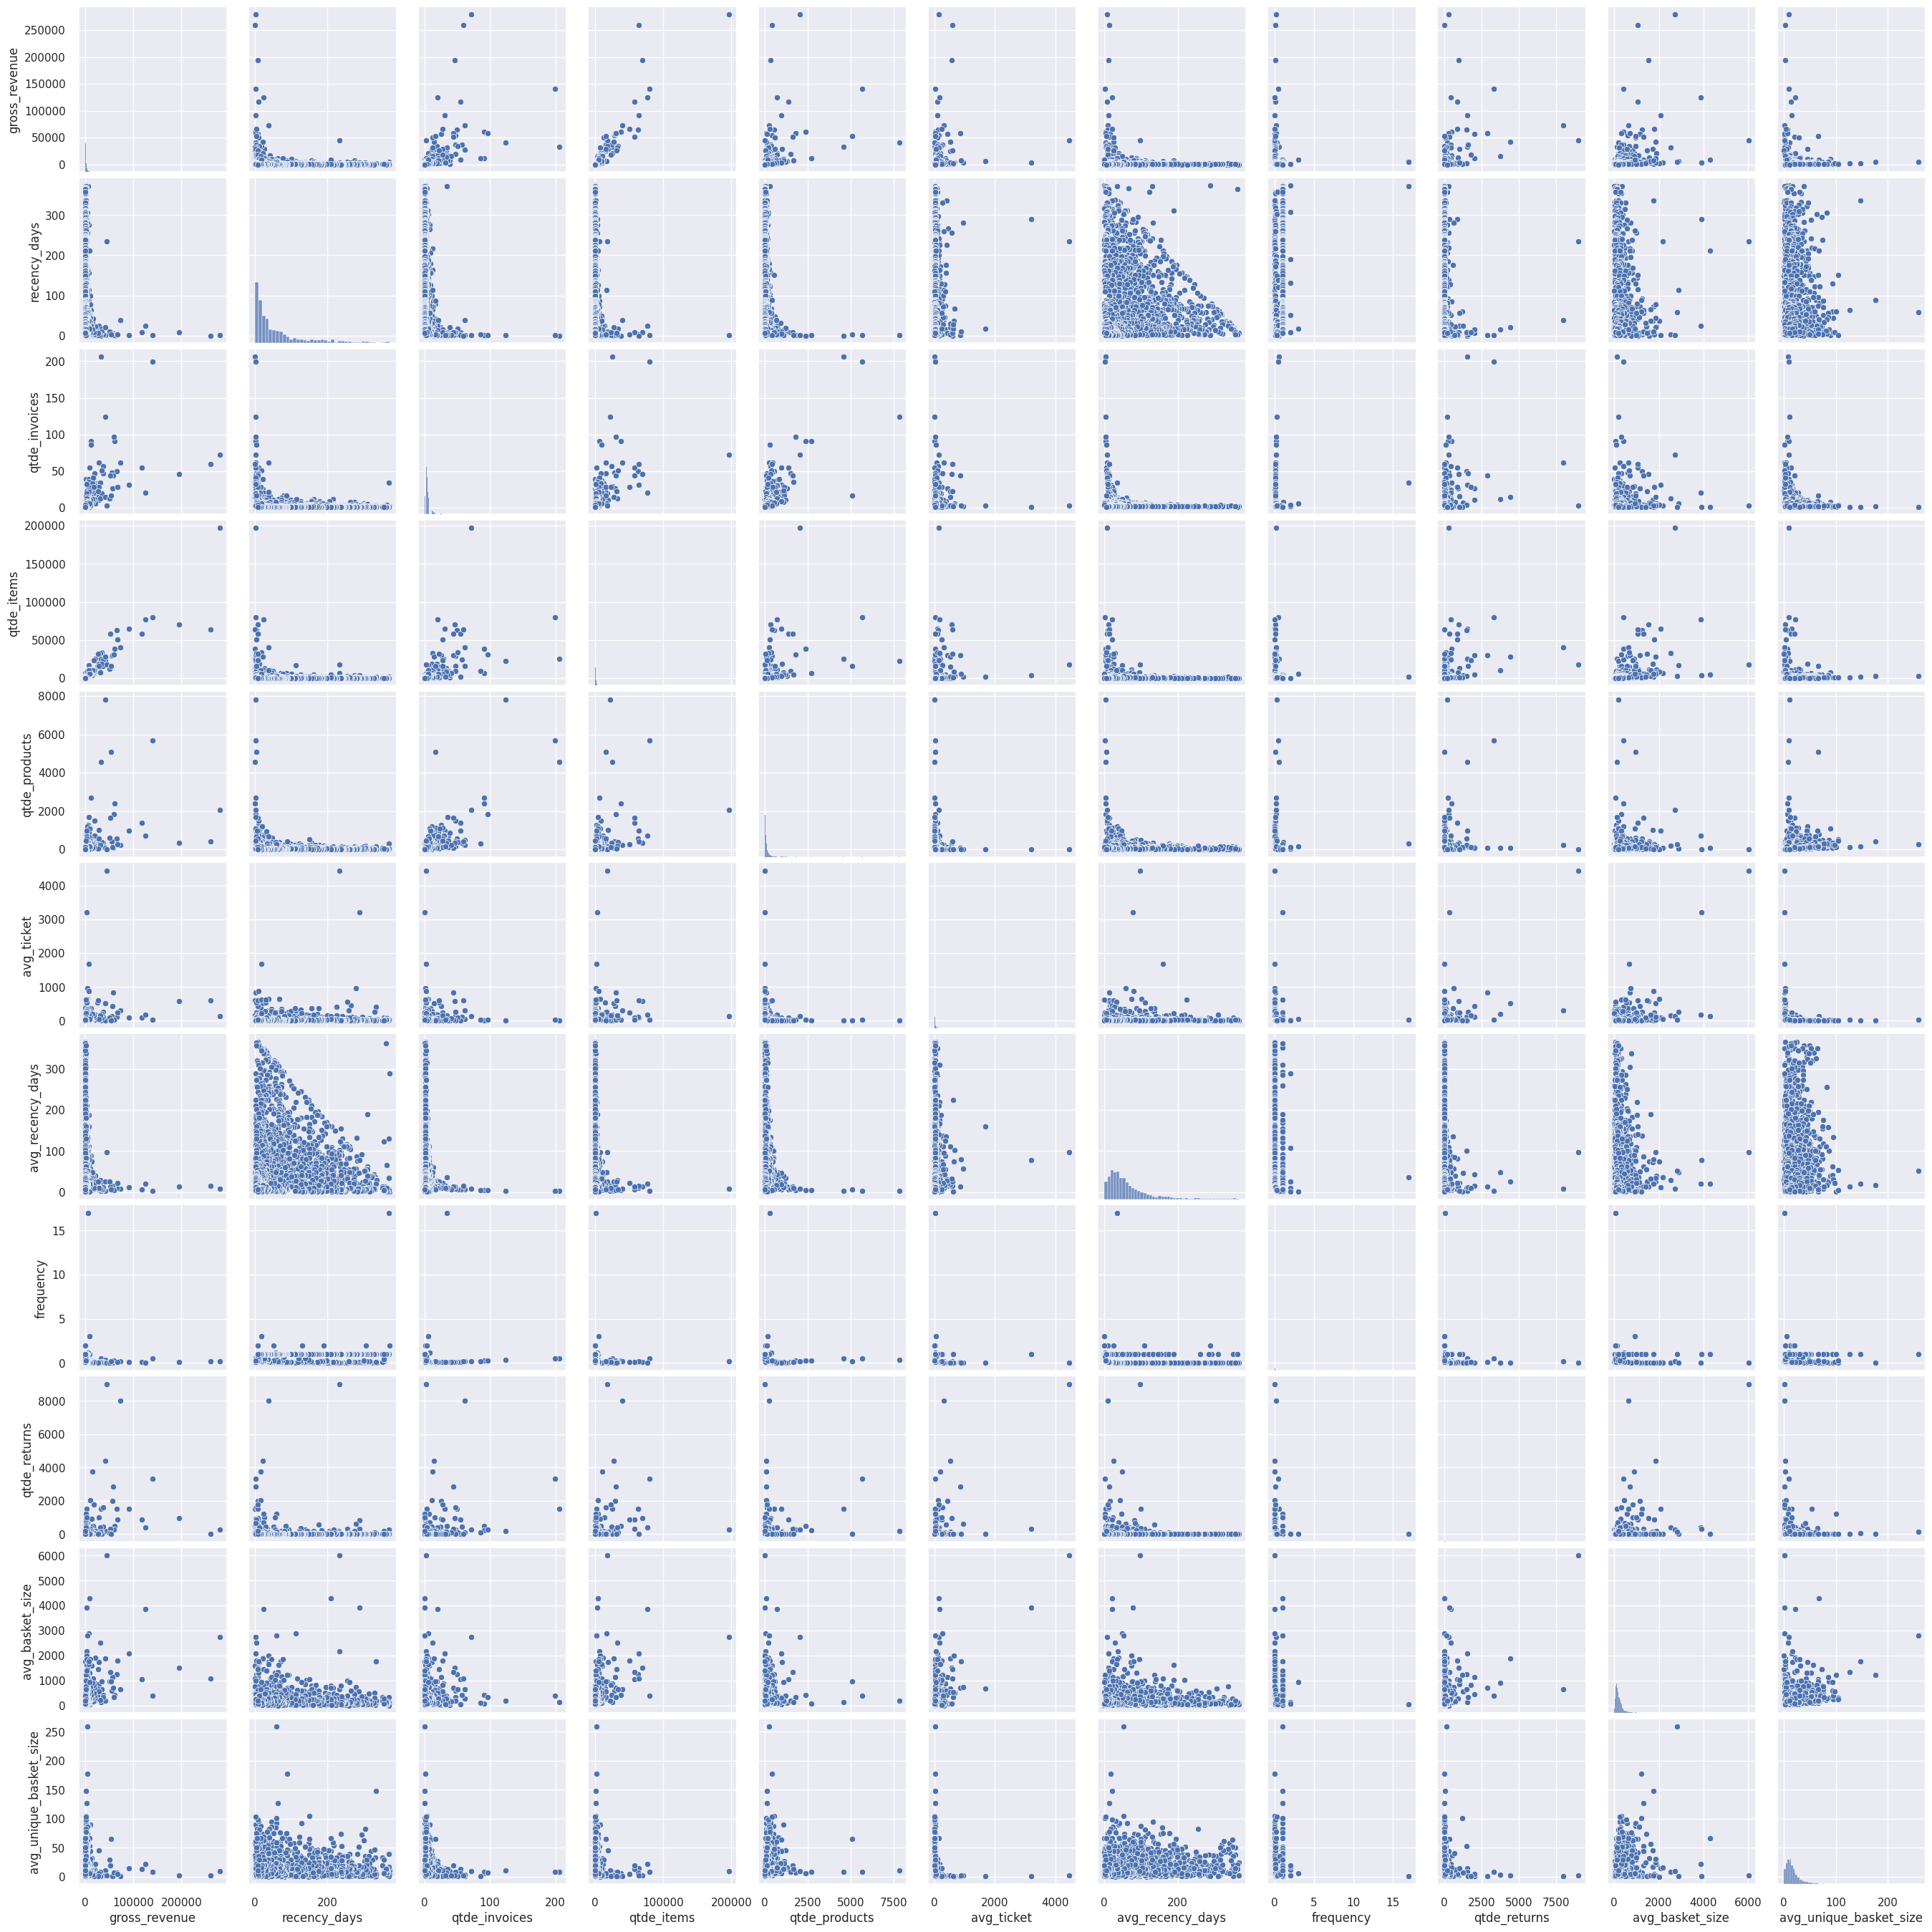

In [54]:
plt.figure( figsize=(25,12) )

sns.pairplot( df52 )

**NOTES**

Frequency has low variance

AVG Ticket has low variance

## 5.3 Estudo do Espaço

In [55]:
df53 = df5.drop(columns='customer_id', axis=1).copy()

In [56]:
mm = pp.MinMaxScaler()

In [57]:
df53.columns

Index(['gross_revenue', 'recency_days', 'qtde_invoices', 'qtde_items',
       'qtde_products', 'avg_ticket', 'avg_recency_days', 'frequency',
       'qtde_returns', 'avg_basket_size', 'avg_unique_basket_size'],
      dtype='object')

In [58]:
df53['gross_revenue']          = mm.fit_transform( df53[['gross_revenue']] )

df53['recency_days']           = mm.fit_transform( df53[['recency_days']] )

df53['qtde_invoices']          = mm.fit_transform( df53[['qtde_invoices']] )

df53['qtde_items']             = mm.fit_transform( df53[['qtde_items']] )

df53['qtde_products']          = mm.fit_transform( df53[['qtde_products']] )

df53['avg_ticket']             = mm.fit_transform( df53[['avg_ticket']] )

df53['avg_recency_days']       = mm.fit_transform( df53[['avg_recency_days']] )

df53['frequency']              = mm.fit_transform( df53[['frequency']] )

df53['qtde_returns']           = mm.fit_transform( df53[['qtde_returns']] )

df53['avg_basket_size']        = mm.fit_transform( df53[['avg_basket_size']] )

df53['avg_unique_basket_size'] = mm.fit_transform( df53[['avg_unique_basket_size']] )

In [59]:
X = df53.copy()

### 5.3.1 PCA

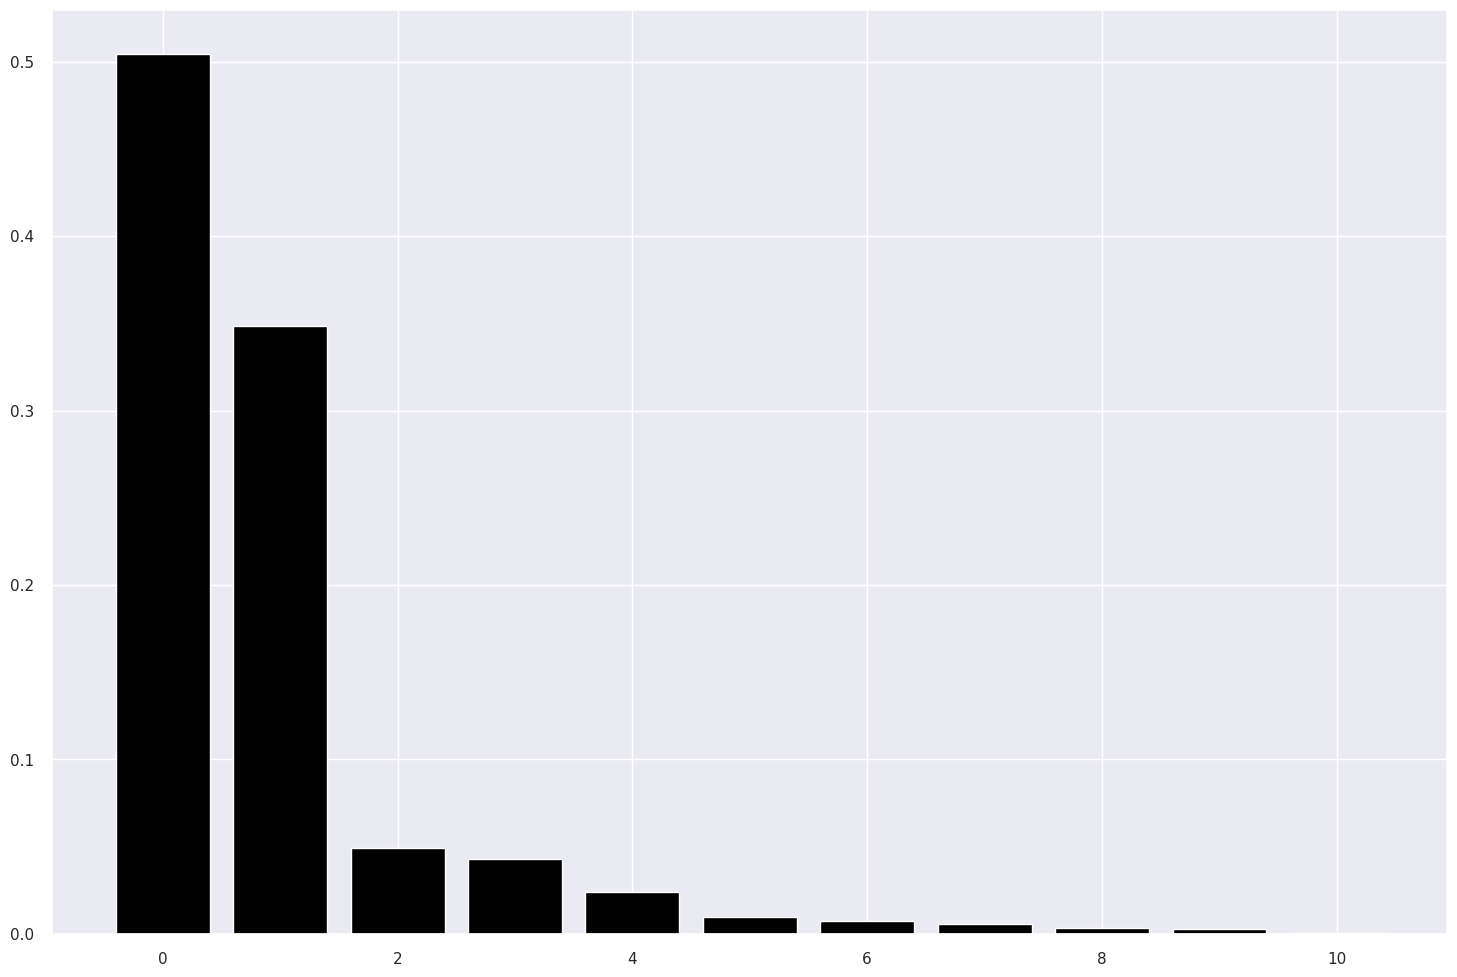

In [60]:
pca = dd.PCA( n_components=X.shape[1] )

principal_components = pca.fit_transform( X )

# plot explained variables
features = range( pca.n_components_ )

plt.bar( features, pca.explained_variance_ratio_, color='black' )

# pca components
df_pca = pd.DataFrame( principal_components )

<Axes: xlabel='0', ylabel='1'>

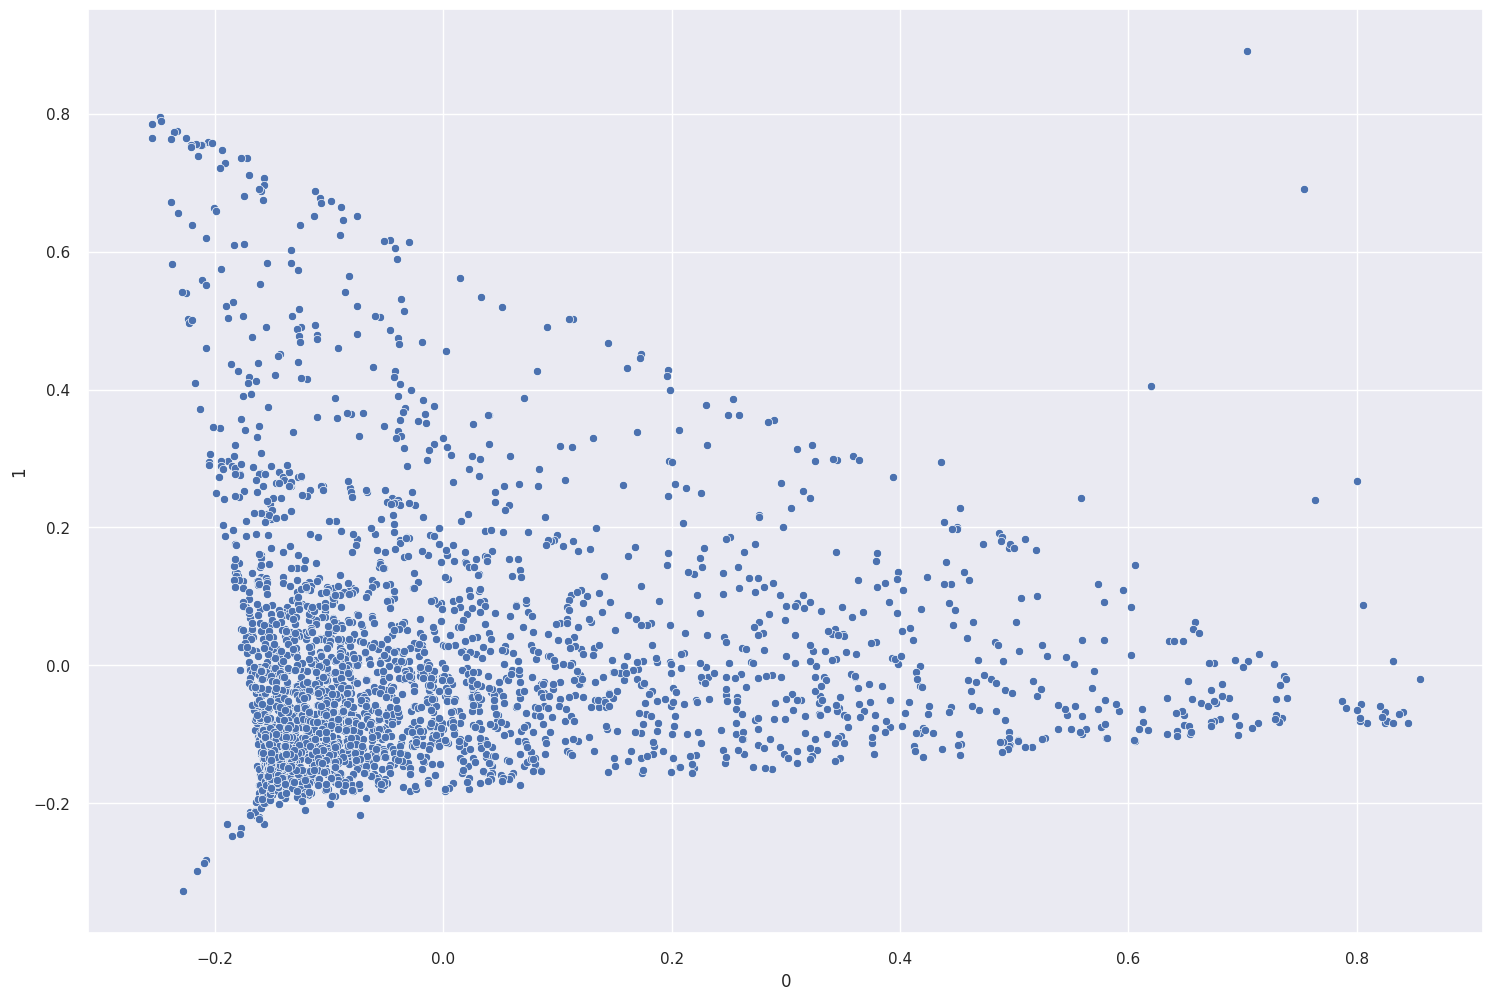

In [61]:
sns.scatterplot( x=0, y=1, data=df_pca )

### 5.3.2 UMAP

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

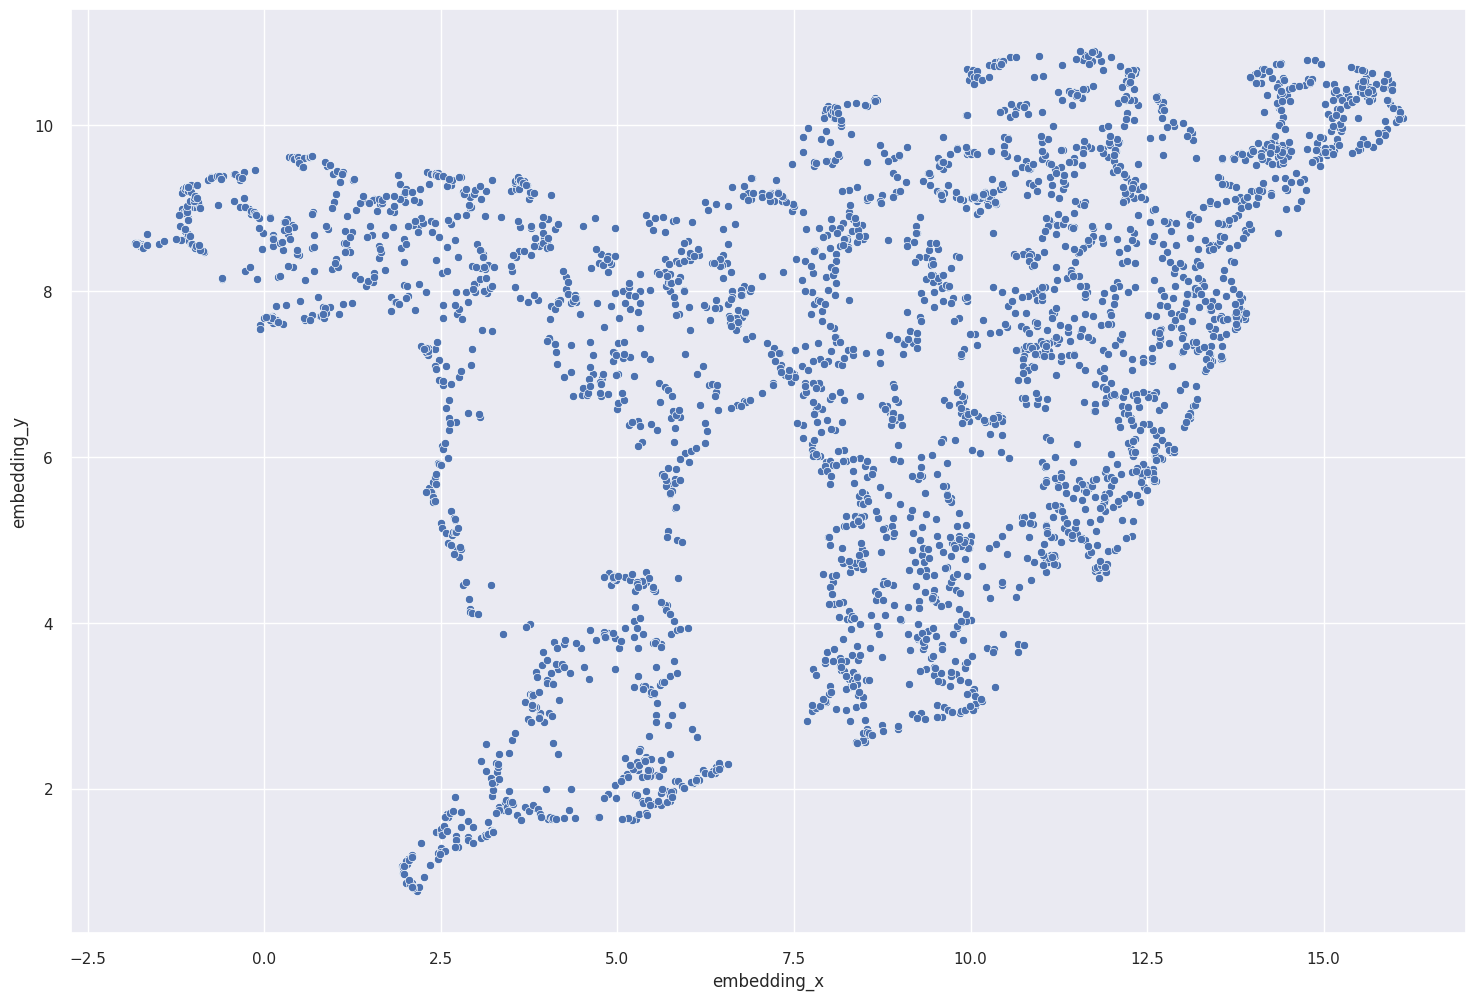

In [62]:
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot( data=df_pca, x='embedding_x', y='embedding_y' )

### 5.3.3 t-SNE

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

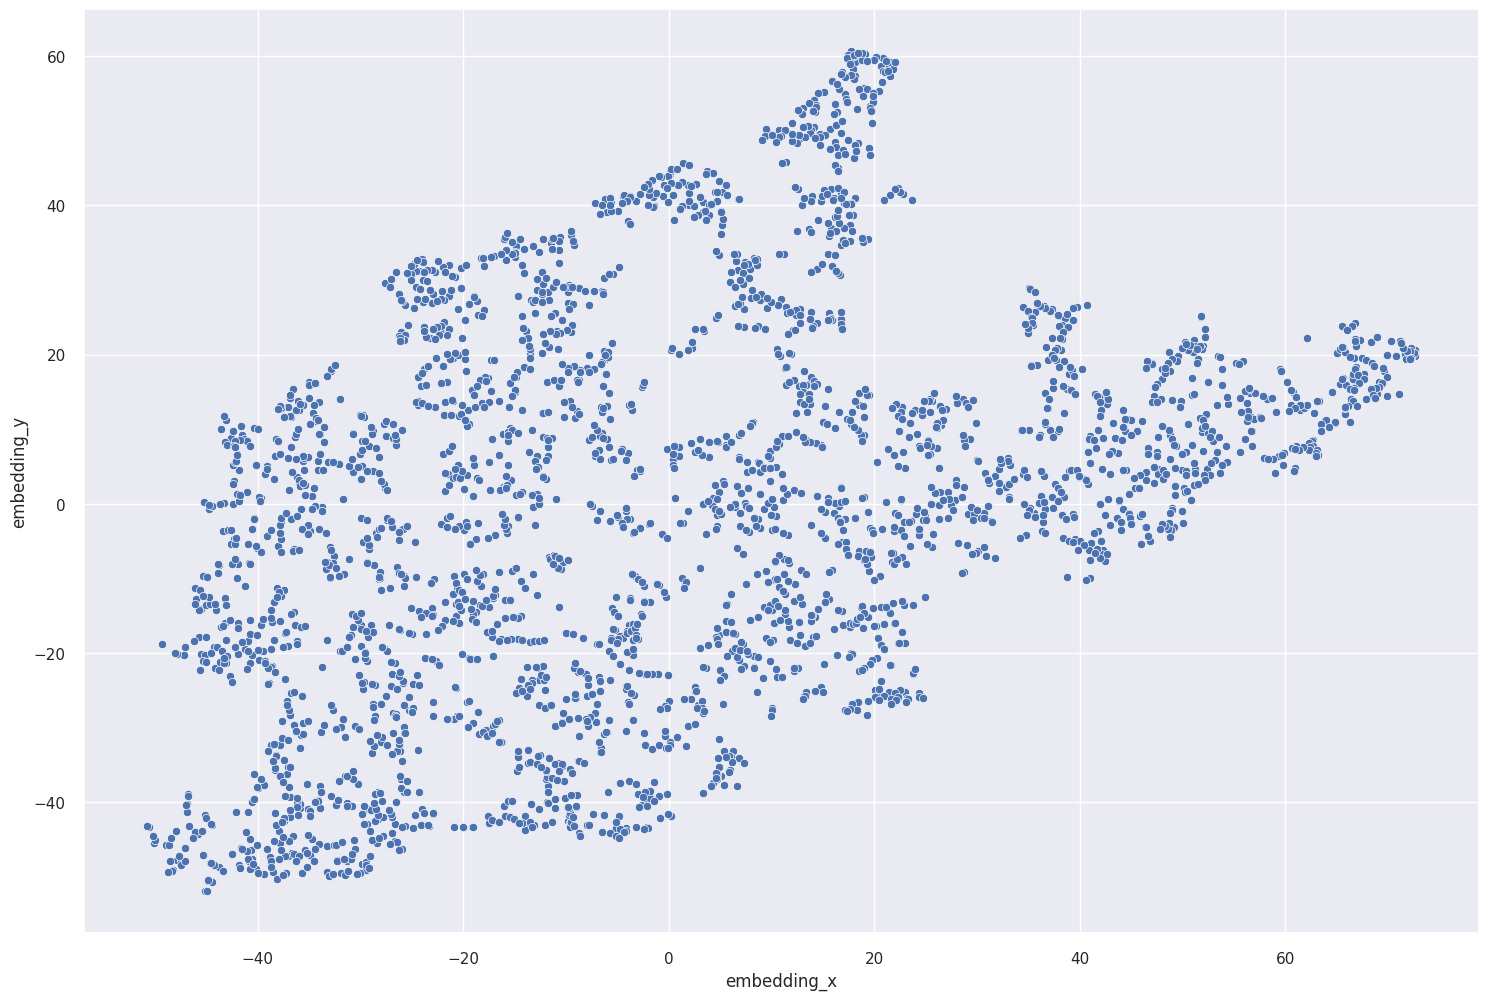

In [63]:
reducer = TSNE( n_components=2, random_state=42, n_jobs=-1 )
embedding = reducer.fit_transform( X )

# embedding
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot( data=df_pca, x='embedding_x', y='embedding_y' )

### 5.3.4 Tree-Based Embedding

In [64]:
# training dataset
X = df5.drop(columns=['customer_id', 'gross_revenue'], axis=1).copy()
y = df5['gross_revenue'].copy()

# model definition
rf_model = en.RandomForestRegressor( n_estimators=100, random_state=42 )

# model training
rf_model.fit( X, y )

# leaf
df_leaf = pd.DataFrame( rf_model.apply( X ) )

# dataframe leaf

In [65]:
df_leaf = pd.DataFrame( rf_model.apply( X ) )

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

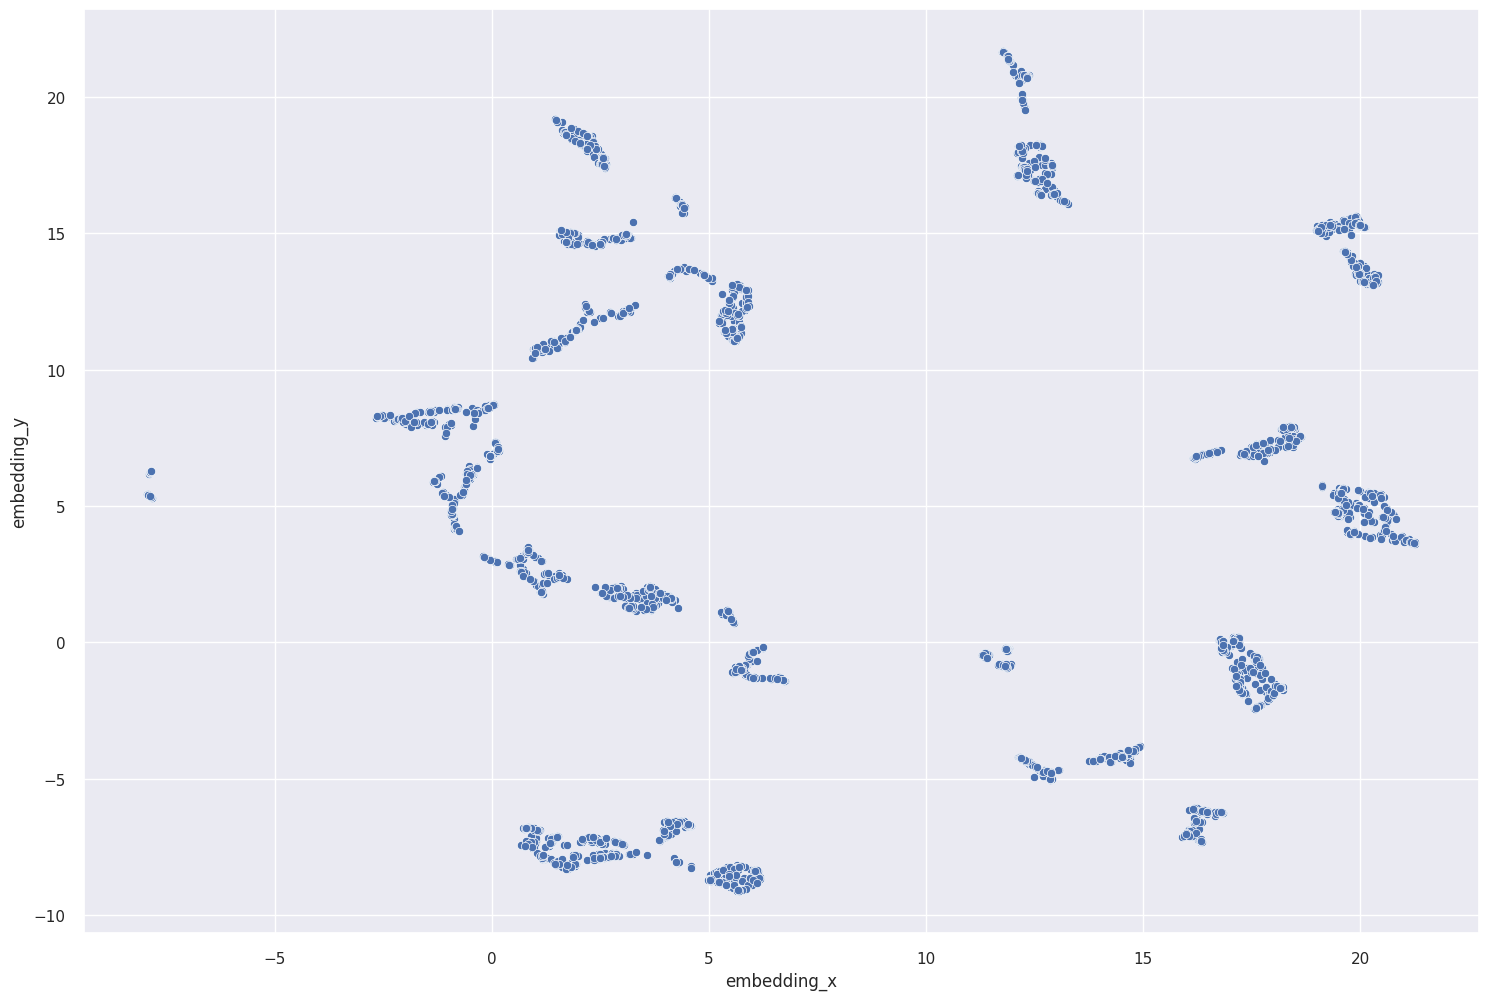

In [66]:
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( df_leaf )

# embedding
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot( data=df_pca, x='embedding_x', y='embedding_y' )

# 6.0 DATA PREPARATION

In [67]:
df6 = df5.copy()

In [68]:
df6.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'qtde_invoices',
       'qtde_items', 'qtde_products', 'avg_ticket', 'avg_recency_days',
       'frequency', 'qtde_returns', 'avg_basket_size',
       'avg_unique_basket_size'],
      dtype='object')

In [69]:
mm = pp.MinMaxScaler()

df6['gross_revenue']          = mm.fit_transform( df6[['gross_revenue']] )

df6['recency_days']           = mm.fit_transform( df6[['recency_days']] )

df6['qtde_invoices']          = mm.fit_transform( df6[['qtde_invoices']] )

df6['qtde_items']             = mm.fit_transform( df6[['qtde_items']] )

df6['qtde_products']          = mm.fit_transform( df6[['qtde_products']] )

df6['avg_ticket']             = mm.fit_transform( df6[['avg_ticket']] )

df6['avg_recency_days']       = mm.fit_transform( df6[['avg_recency_days']] )

df6['frequency']              = mm.fit_transform( df6[['frequency']] )

df6['qtde_returns']           = mm.fit_transform( df6[['qtde_returns']] )

df6['avg_basket_size']        = mm.fit_transform( df6[['avg_basket_size']] )

df6['avg_unique_basket_size'] = mm.fit_transform( df6[['avg_unique_basket_size']] )

In [70]:
df6.head()

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size
0        17850       0.019292      0.997319       0.160976    0.008799       0.037774    0.003595          0.094521   1.000000      0.004438         0.008317                0.001614
1        13047       0.011559      0.150134       0.039024    0.007056       0.021695    0.003764          0.071918   0.001345      0.003883         0.025539                0.044307
2        12583       0.024000      0.005362       0.068293    0.025538       0.029479    0.006010          0.060788   0.002052      0.005547         0.055623                0.028594
3        13748       0.003375      0.254692       0.019512    0.002225       0.003446    0.007125          0.251142   0.000734      0.000000         0.014447                0.017774
4        15100       0.003116      0.892761       0.009756    0.000401       0.000255    0.065116          0.020822   0.003985      0.002441         0.004272                0.000515

# 7.0 FEATURE SELECTION

In [71]:
df7 = df6.copy()

# 8.0 HYPERPARAMETER FINE TUNNING

In [72]:
X = df7.drop(columns = ['customer_id'], axis=1)

In [73]:
clusters = [2, 3, 4, 5, 6, 7]

## 8.1 Gaussian

## 8.1 Within-Cluster Sum of Square (WSS)

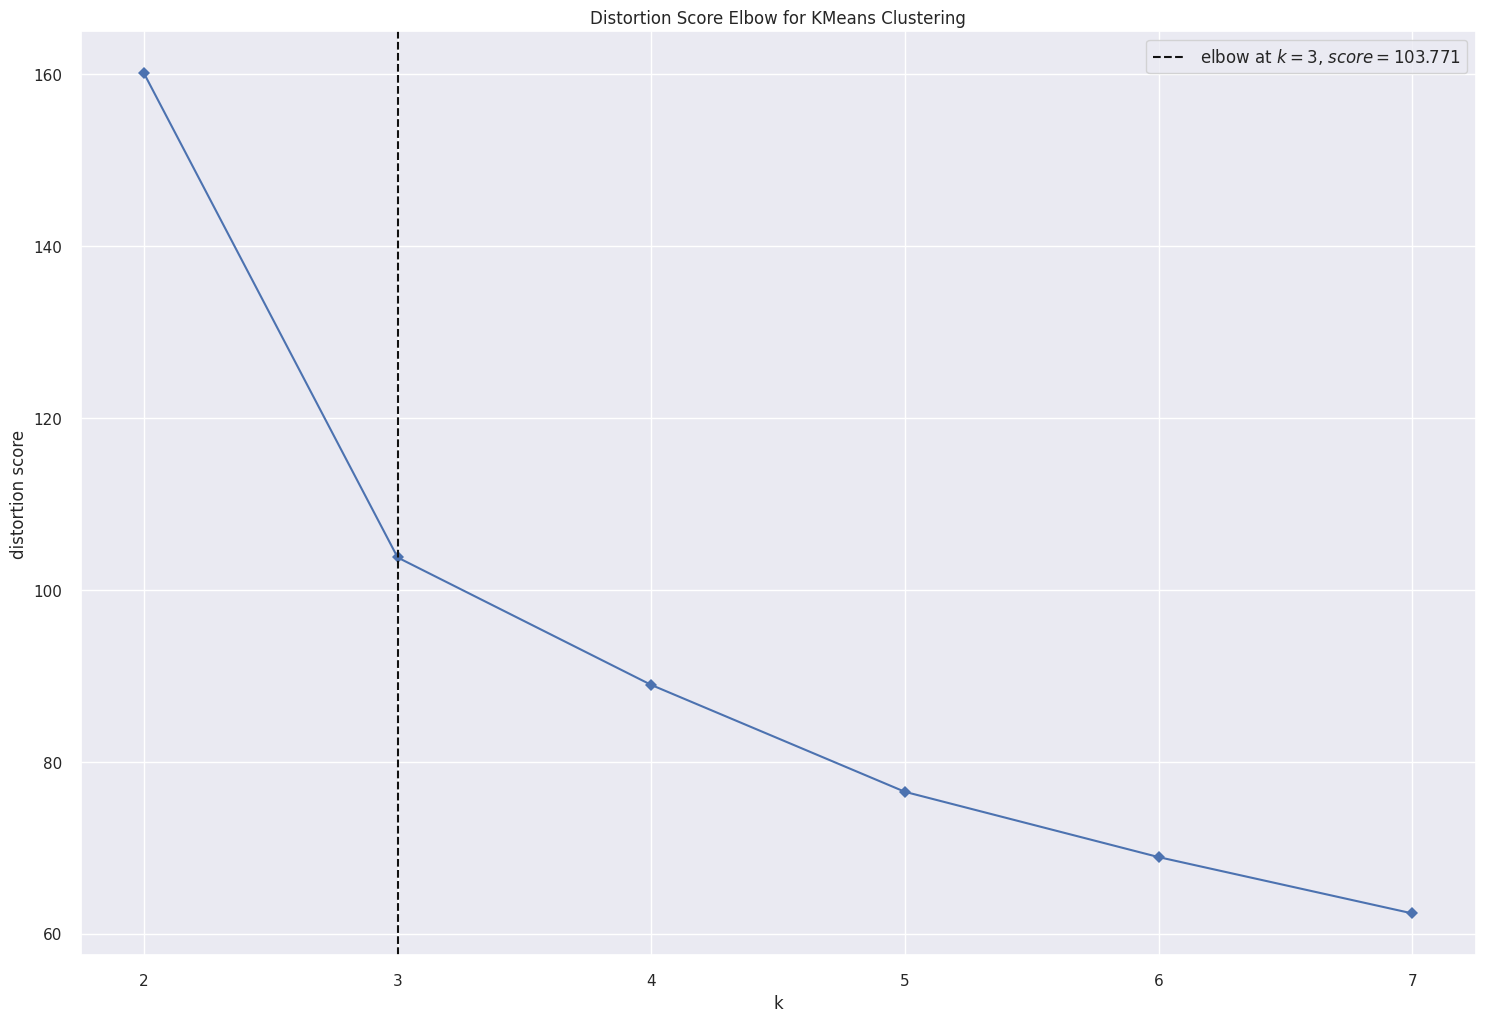

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
kmeans = KElbowVisualizer(c.KMeans(n_init=10), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show()

## 8.2 Silhouette Score (KMeans)

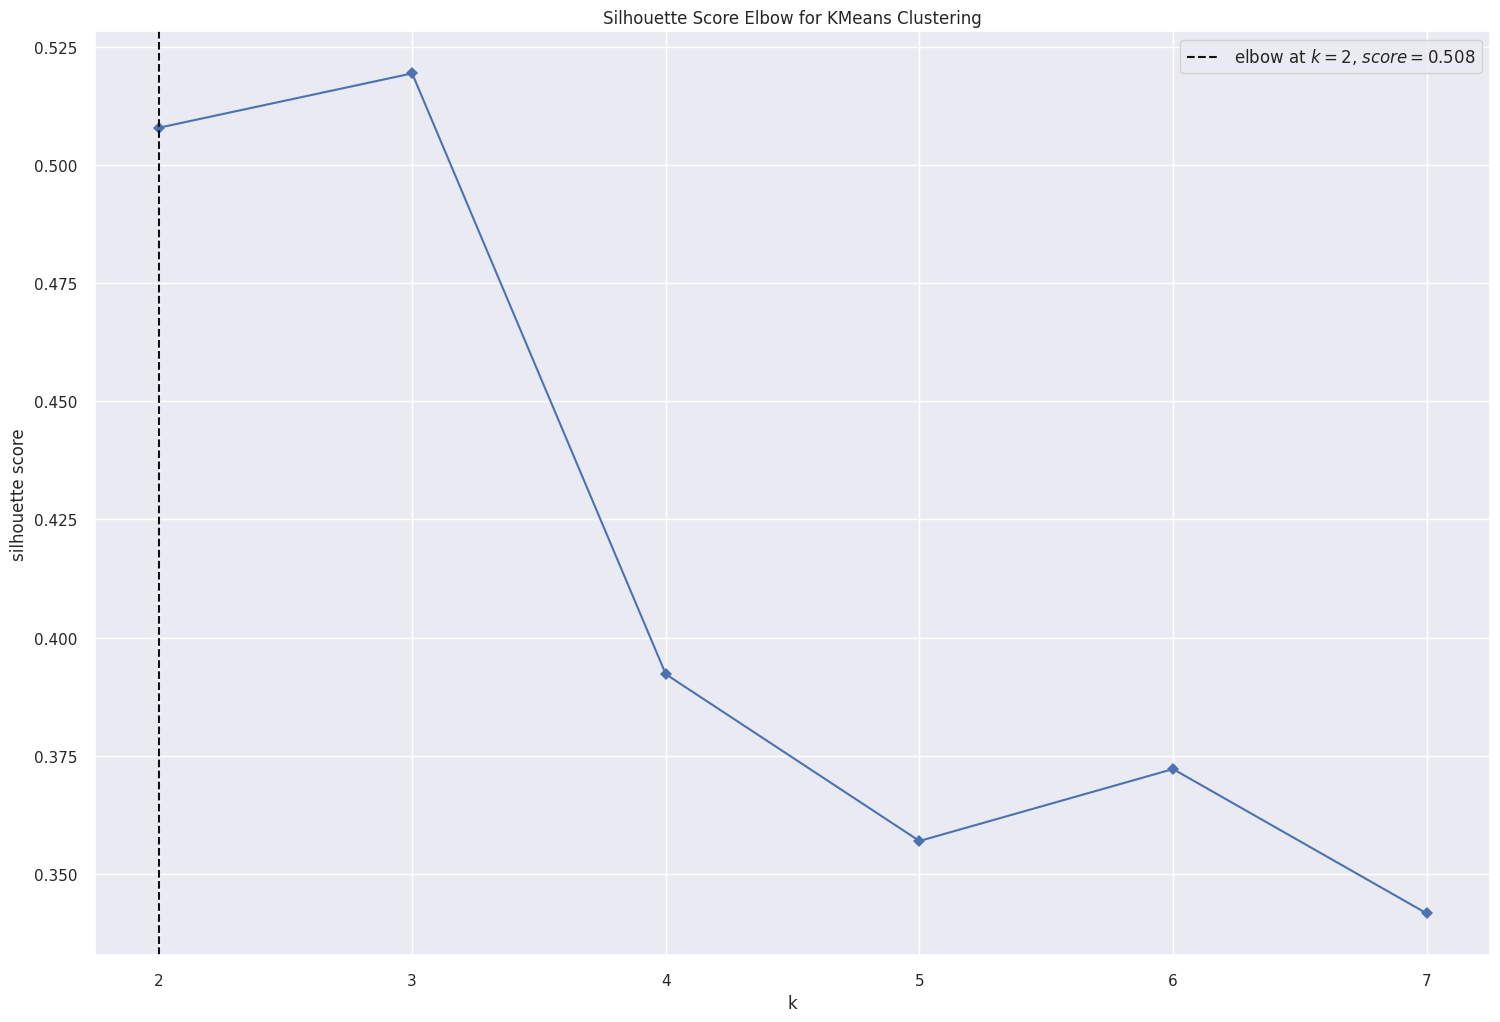

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [75]:
kmeans = KElbowVisualizer(c.KMeans(n_init=10), k=clusters, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show()

## 8.3 Silhouette Analysis

In [76]:
# fig, ax = plt.subplots( 3, 2, figsize=(12, 6) )
# for x in clusters:
#     km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42 )
#     q, mod = divmod( k, 2 )
    
#     visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][mod] )
#     visualizer.fit(X)
#     visualizer.finalize()

#### K = 2

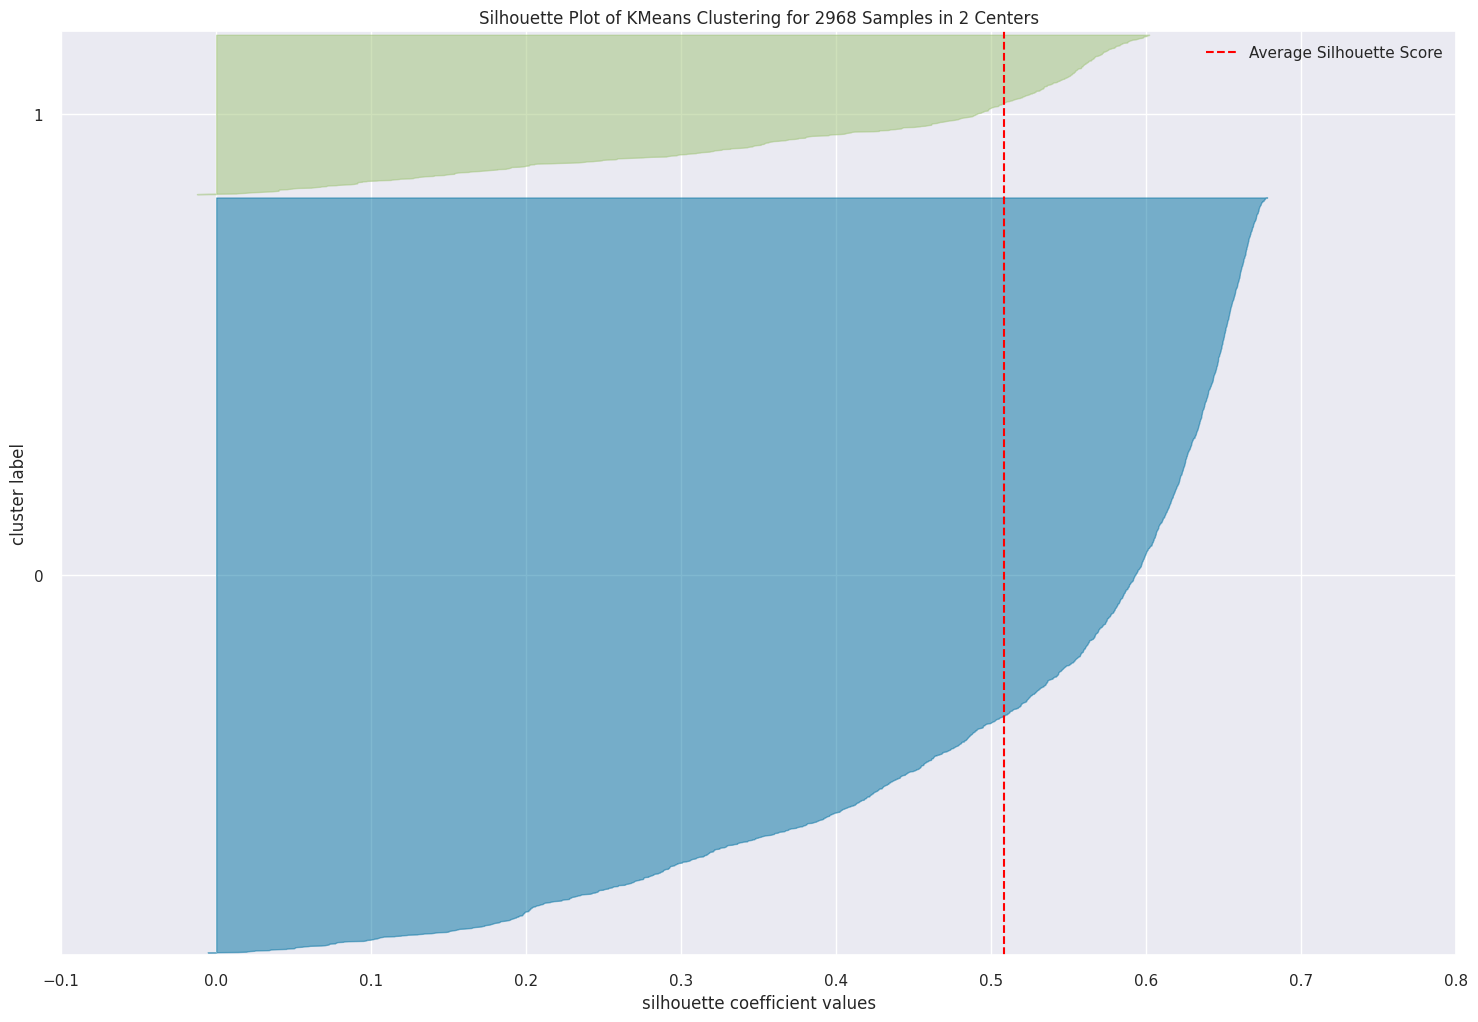

In [77]:
km = c.KMeans( n_clusters=2, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

#### K = 3

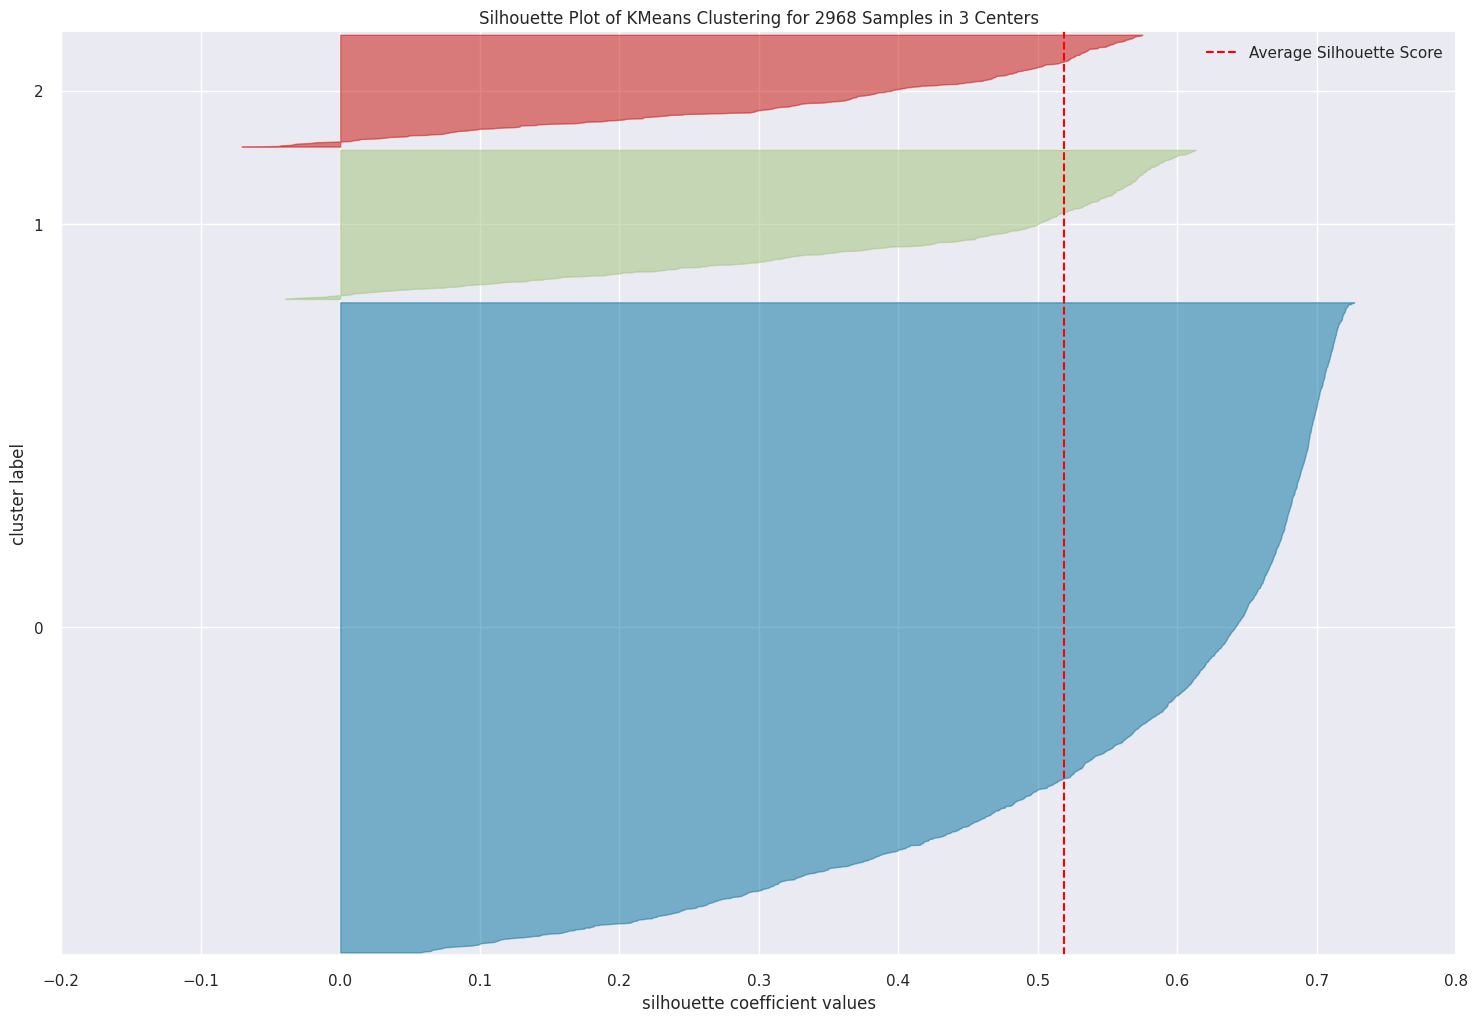

In [78]:
km = c.KMeans( n_clusters=3, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

#### K = 4

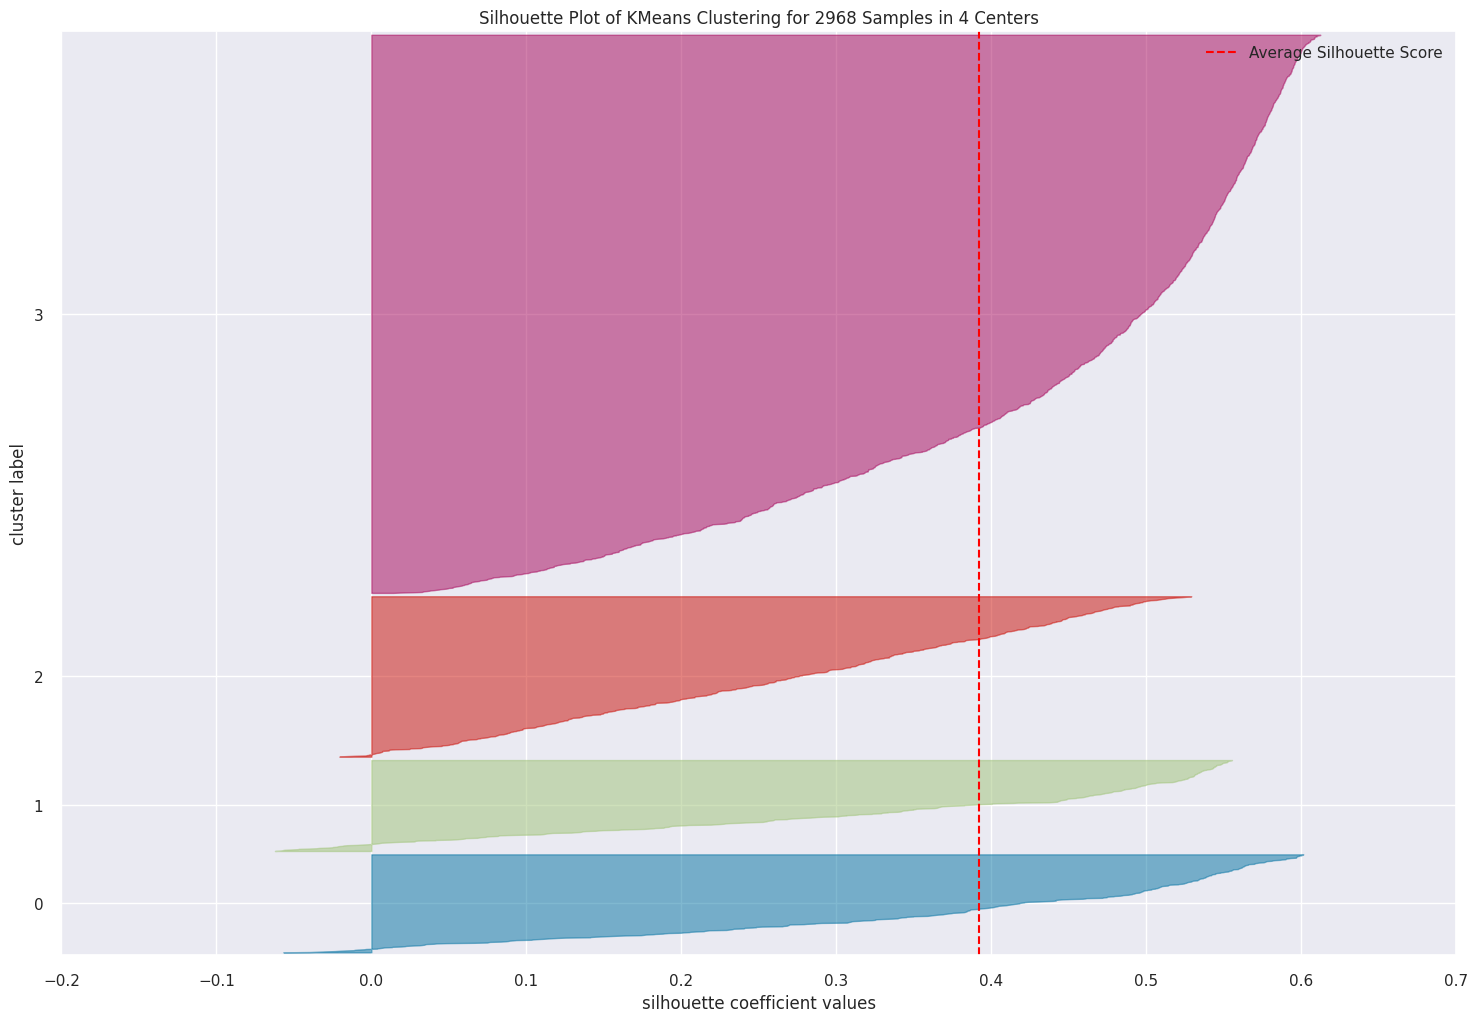

In [79]:
km = c.KMeans( n_clusters=4, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

#### K = 5

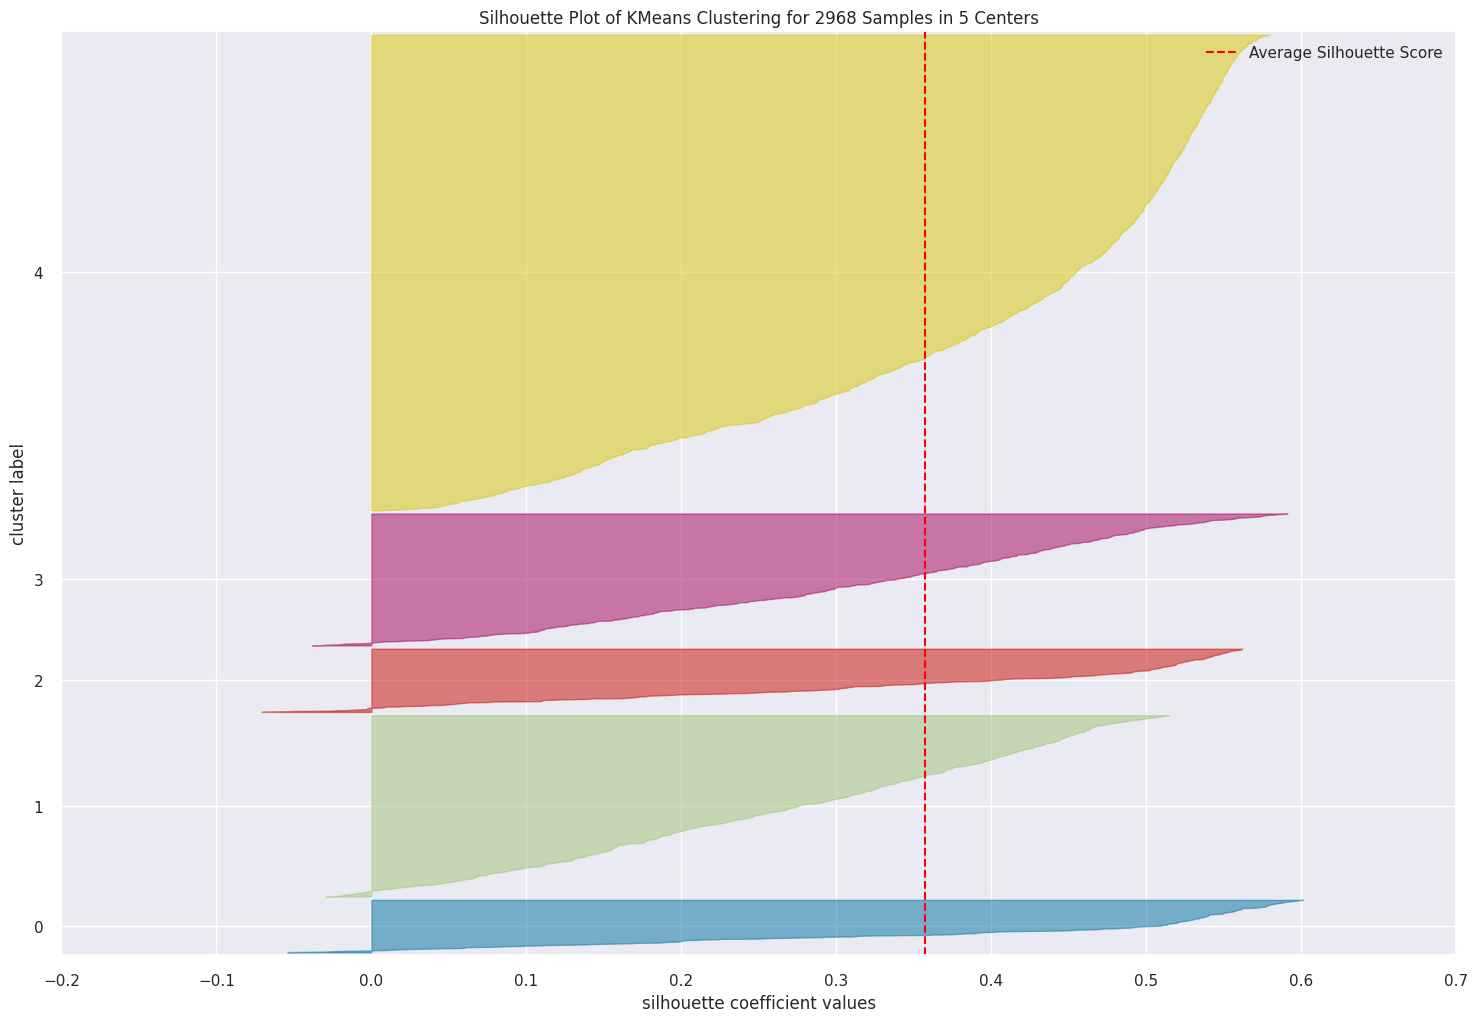

In [80]:
km = c.KMeans( n_clusters=5, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

#### K = 6

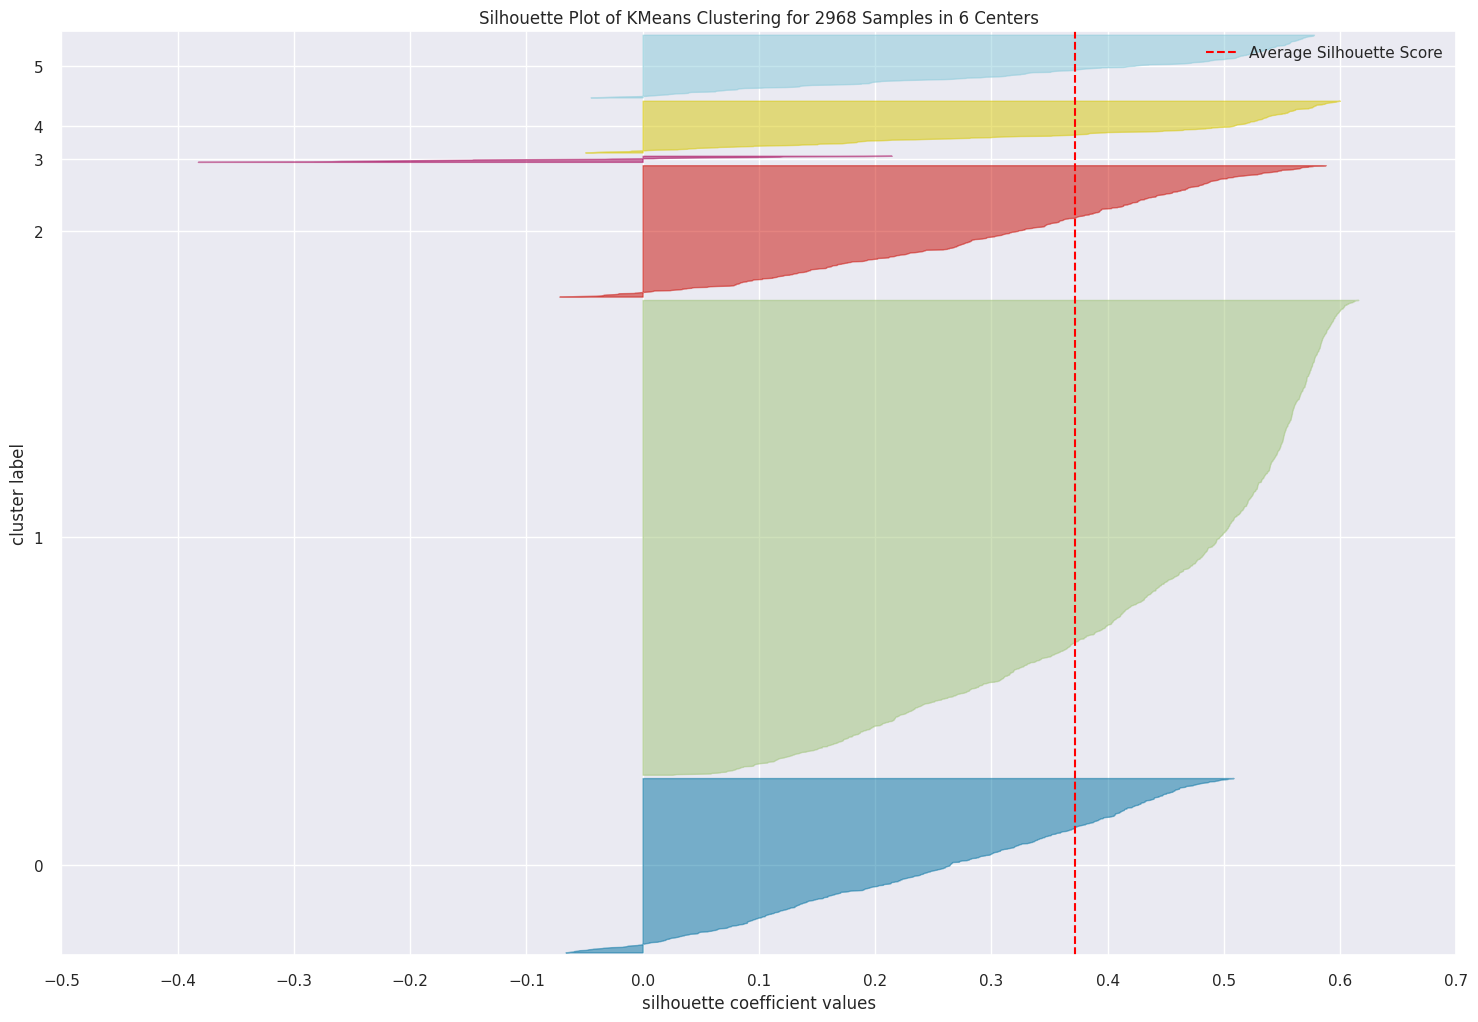

In [81]:
km = c.KMeans( n_clusters=6, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

#### K = 7

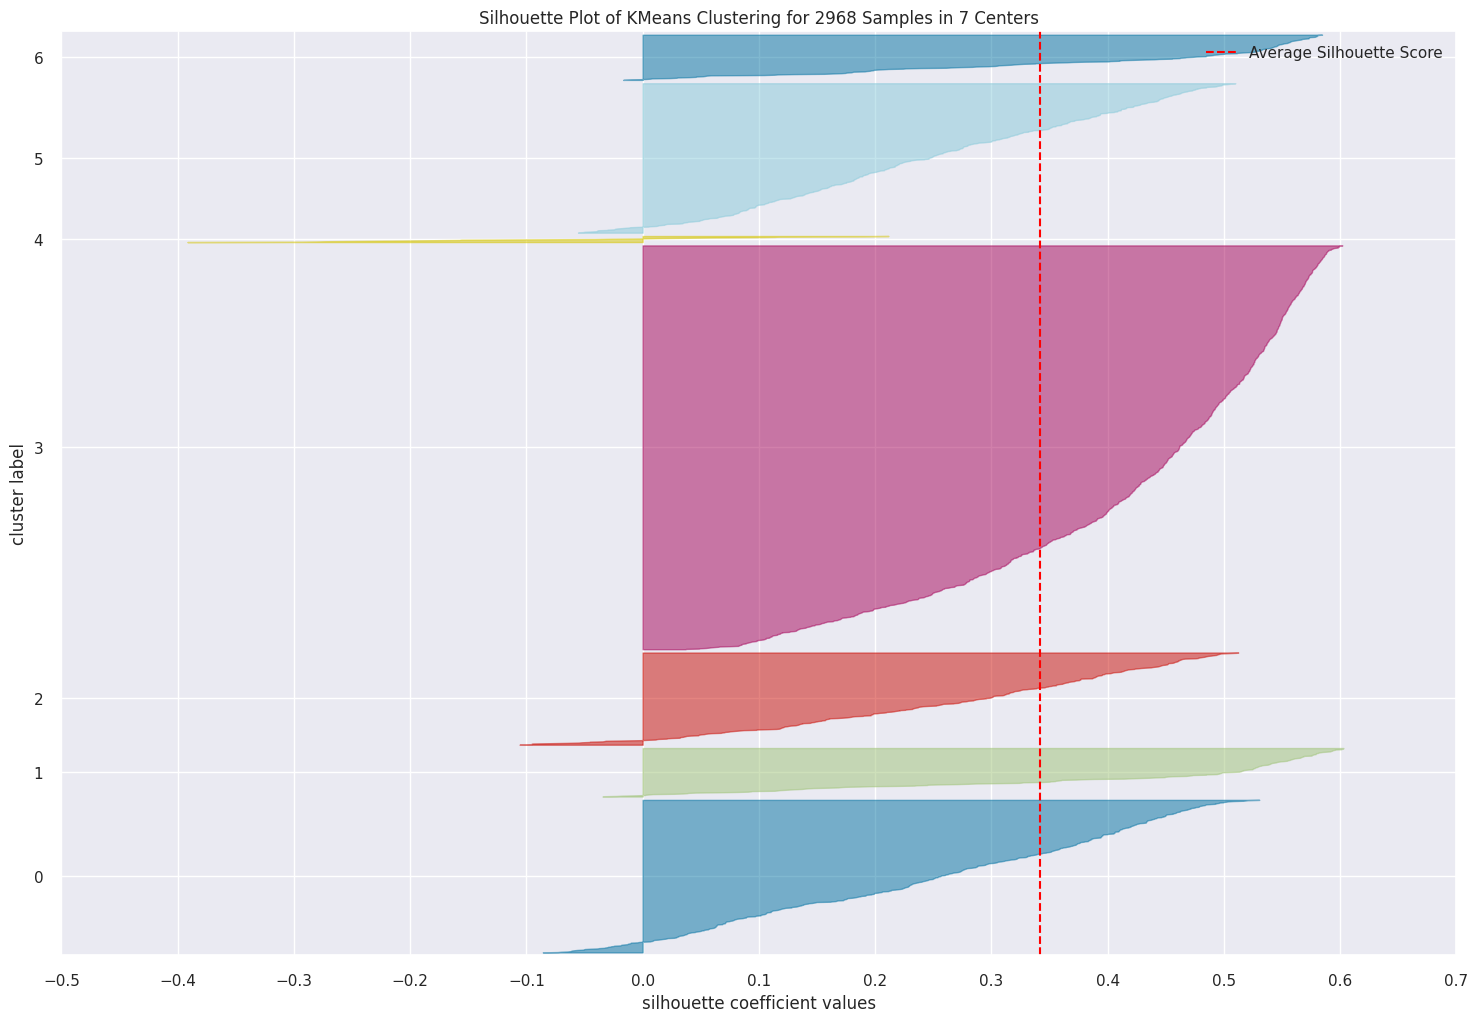

In [82]:
km = c.KMeans( n_clusters=7, init='random', n_init=10, max_iter=300, random_state=42 )
visualizer = SilhouetteVisualizer( km, colors='yellowbrick' )
visualizer.fit(X)
visualizer.finalize()

# 9.0 MODEL TRAINING

## 9.1 KMeans

In [83]:
# model definition
k = 5
kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

## 9.2 Cluster Validation

In [84]:
from sklearn import metrics as m

In [85]:
# WSS
print('WSS value: {}'.format( kmeans.inertia_ ))

# SS
print('SS value: {}'.format( m.silhouette_score( X, labels, metric='euclidean' ) ) )

WSS value: 76.4938363623934
SS value: 0.3568855702391406


# 10.0 CLUSTER ANALYSIS

In [86]:
df10 = df7.copy()
df10['cluster'] = labels
df10.head()

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size  cluster
0        17850       0.019292      0.997319       0.160976    0.008799       0.037774    0.003595          0.094521   1.000000      0.004438         0.008317                0.001614        2
1        13047       0.011559      0.150134       0.039024    0.007056       0.021695    0.003764          0.071918   0.001345      0.003883         0.025539                0.044307        4
2        12583       0.024000      0.005362       0.068293    0.025538       0.029479    0.006010          0.060788   0.002052      0.005547         0.055623                0.028594        4
3        13748       0.003375      0.254692       0.019512    0.002225       0.003446    0.007125          0.251142   0.000734      0.000000         0.014447                0.017774        1
4        15100       0.003116      0.892761       0.009756    0.000401       0.000255    0.065116          0.020822   0.003985      0.002441         0.004272                0.000515        2

## 10.1 Visualization Inspection

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


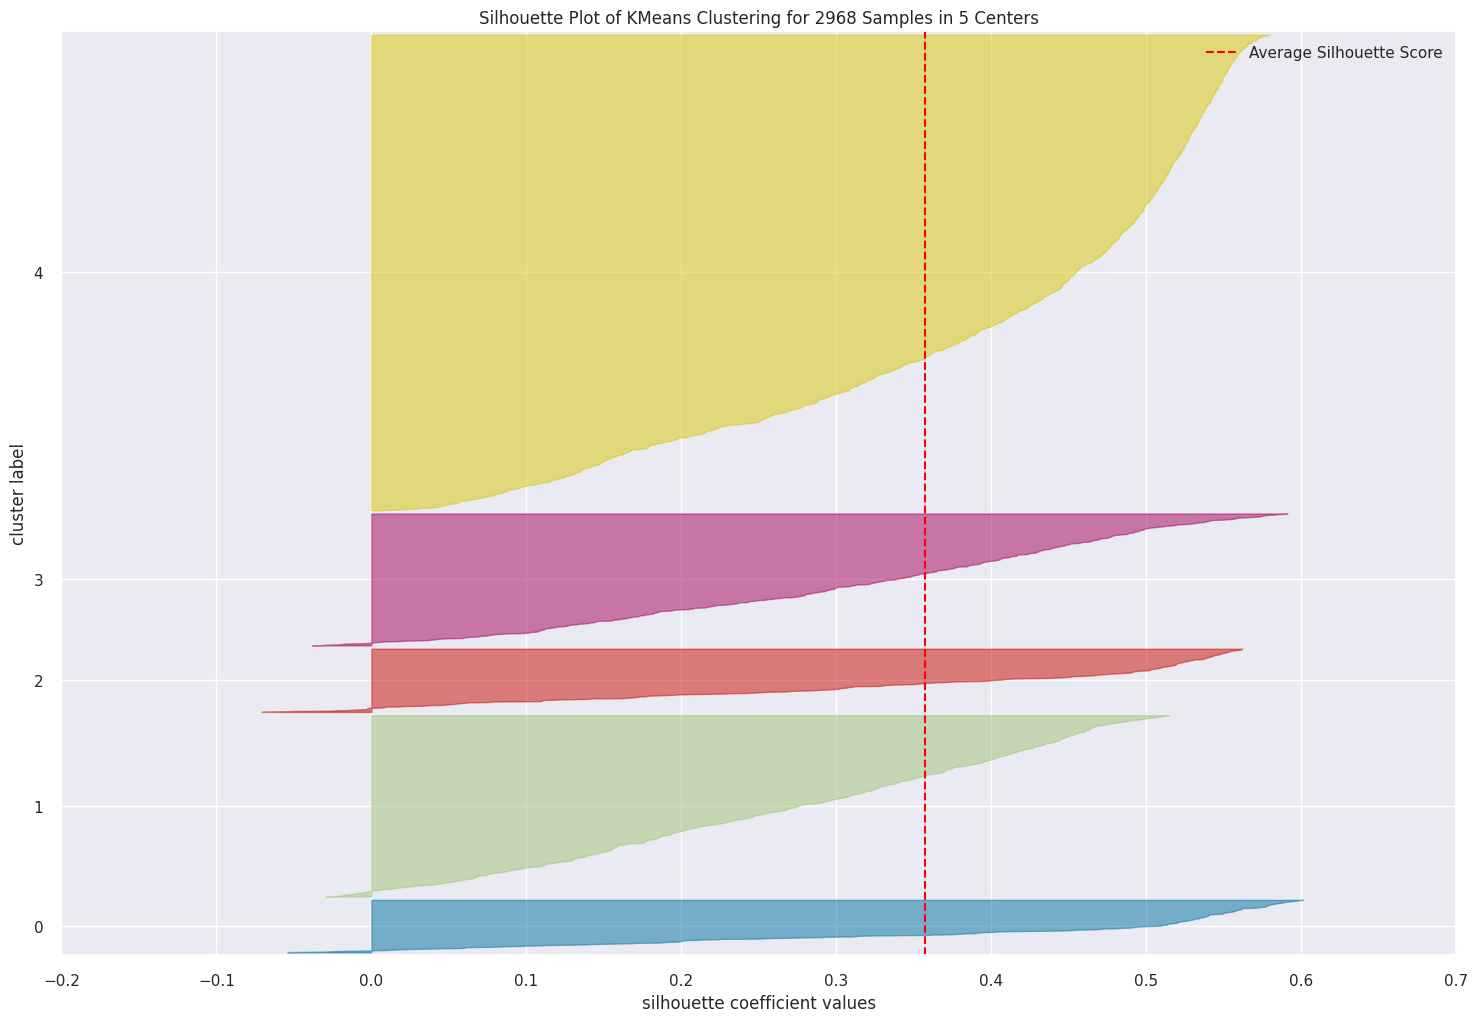

In [87]:
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick' )
visualizer.fit( X )
visualizer.finalize()

## 10.2 2d_plot

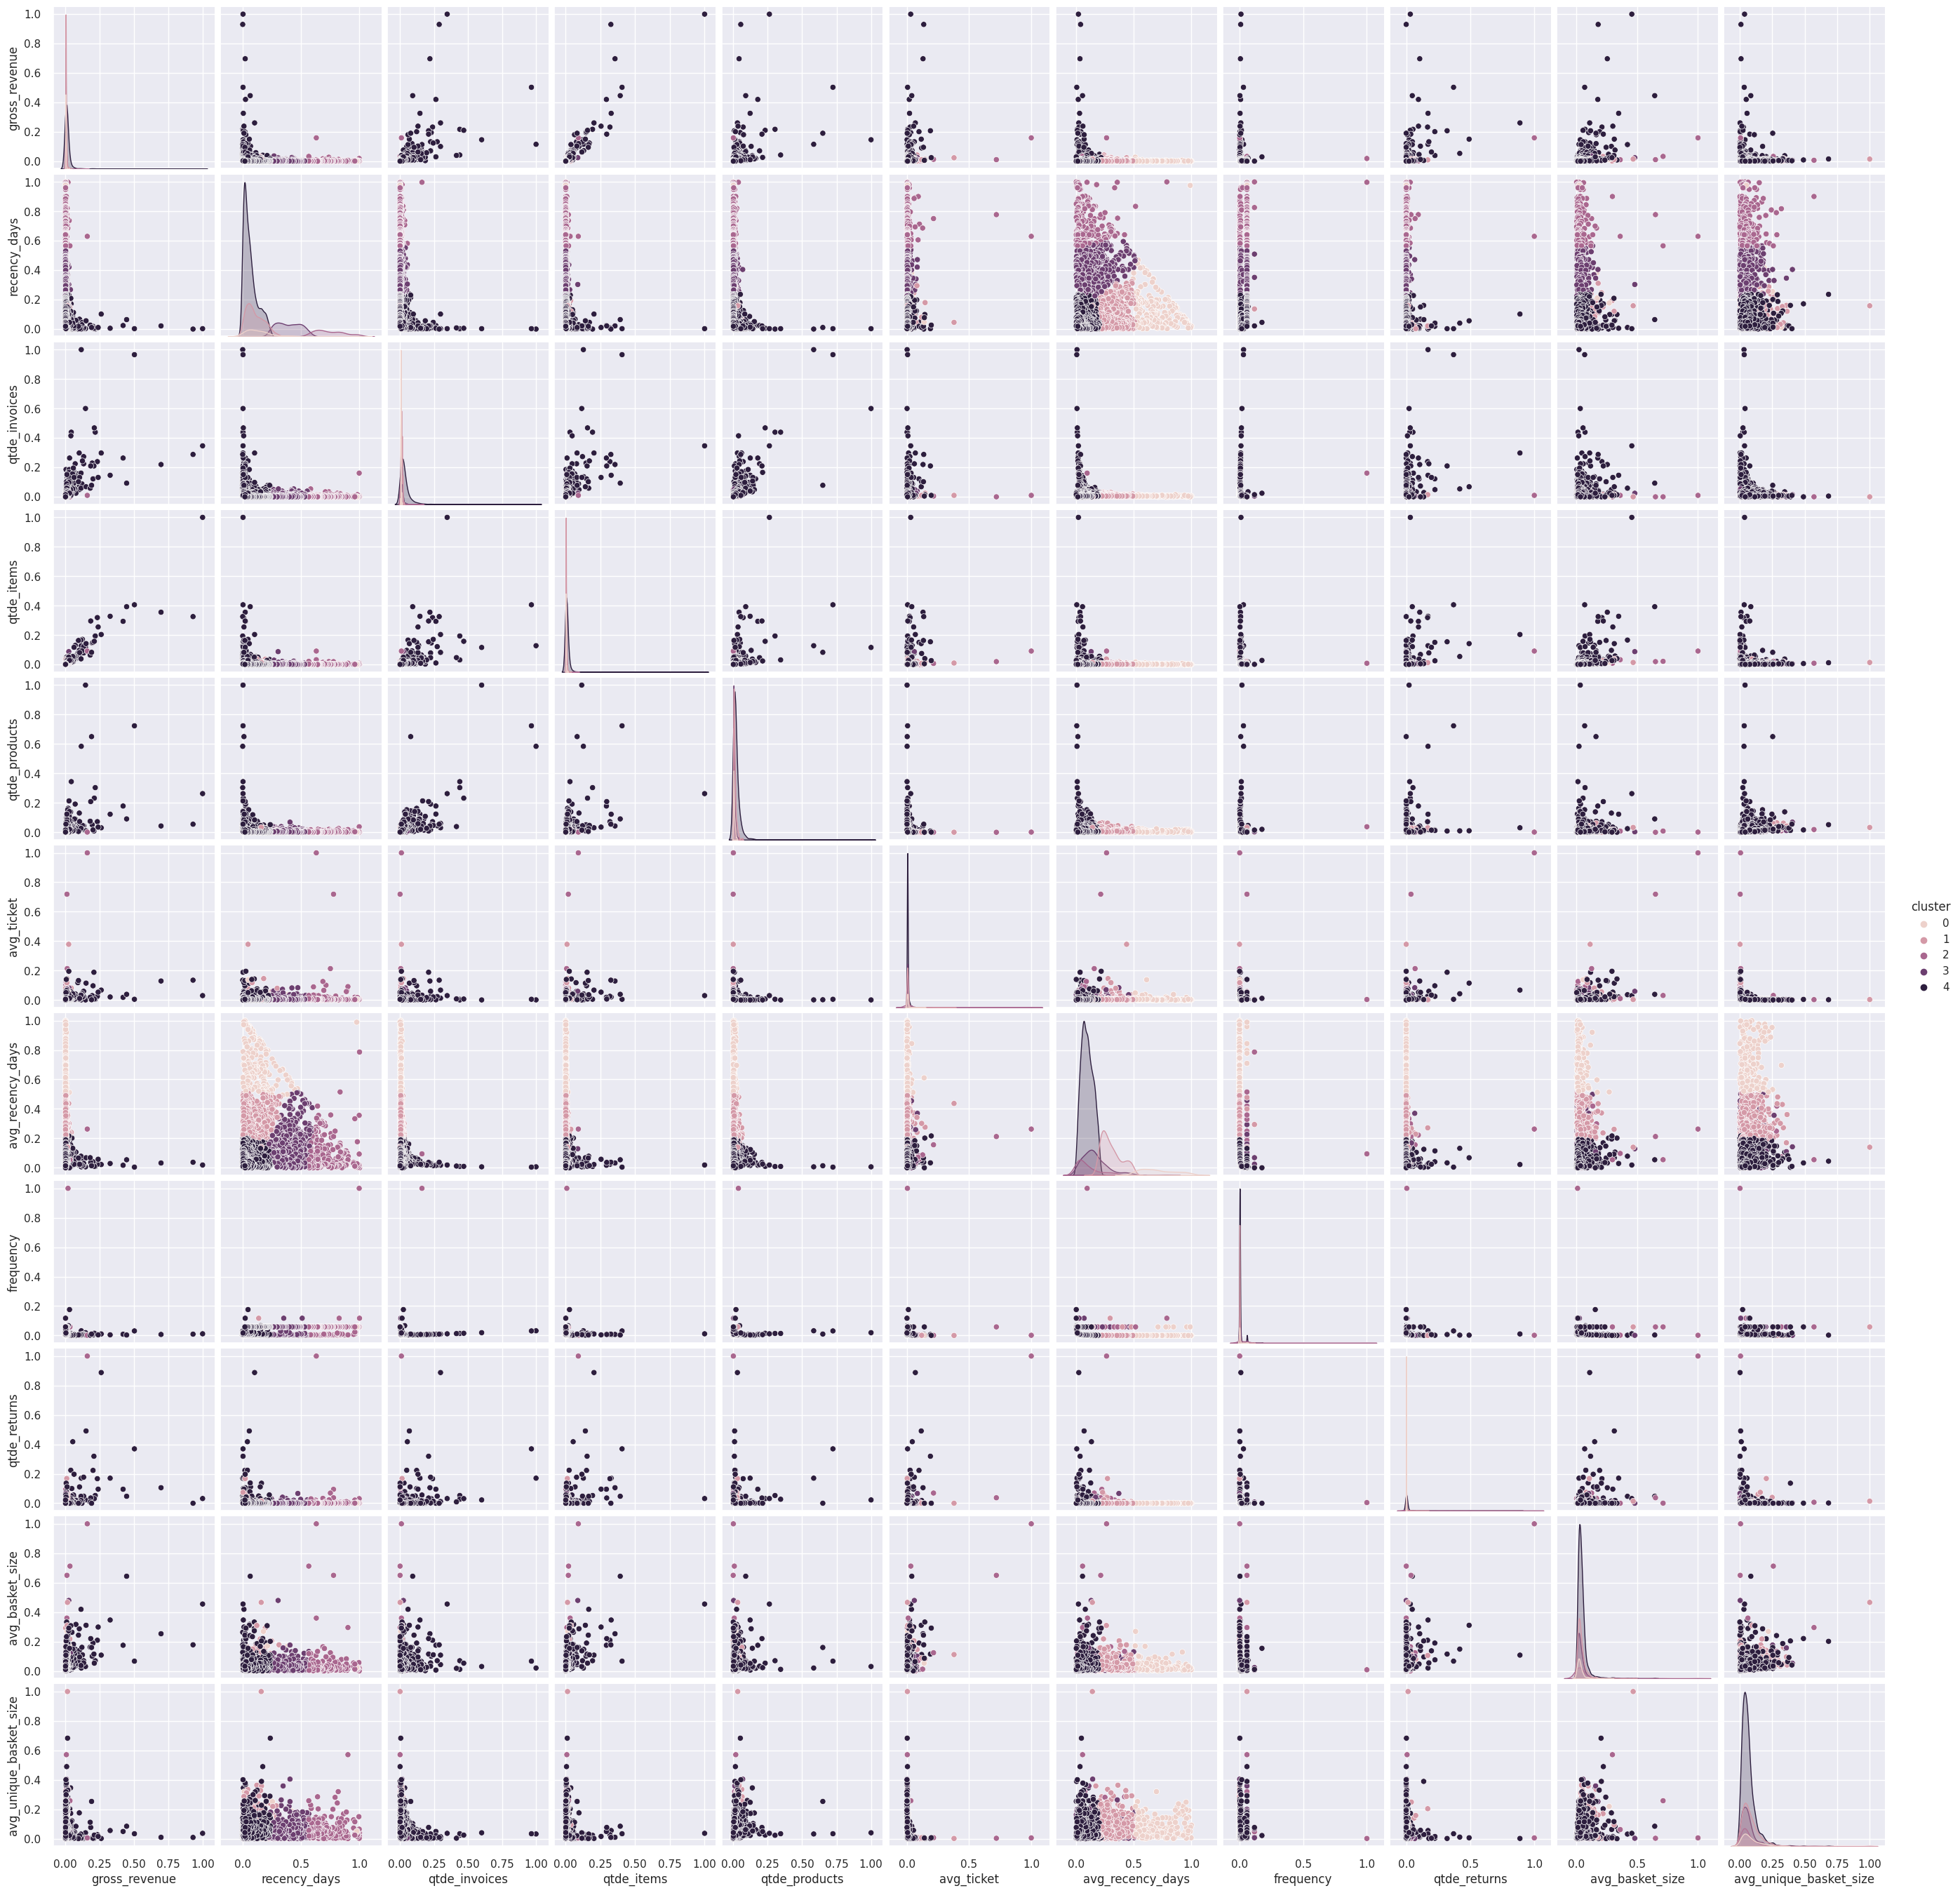

In [88]:
df_viz = df10.drop( columns='customer_id', axis=1 )
sns.pairplot( df_viz, hue='cluster')

## 10.3 UMAP - t-SNE

Machine Learning - Manifold

PCA - Matrix, Espaço de Distância - Espaço de Hilbert - 9 colorários

UMAP - t-SNE (2009) - Topologia

UMAP - Mais rapido para grande volume de dados, tem dificuldade pra visualização
t-SNE - Mas lento mas tem uma precisão melhor de visualização


<Axes: xlabel='embedding_x', ylabel='embedding_y'>

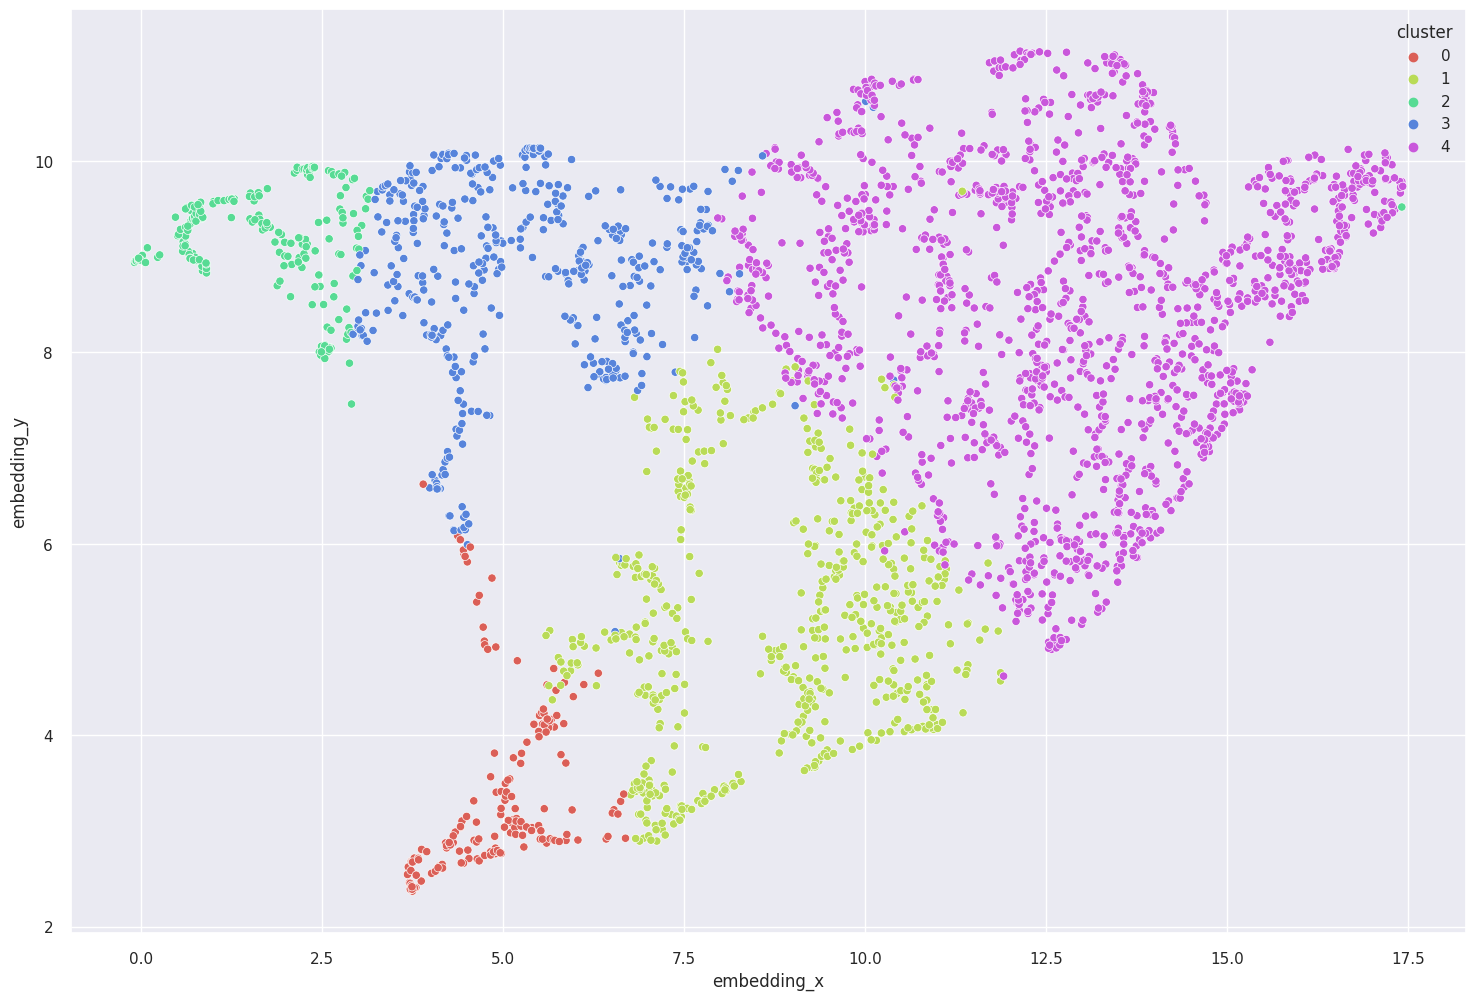

In [89]:
reducer = umap.UMAP( n_neighbors=20, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot( data=df_viz, x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ) )

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

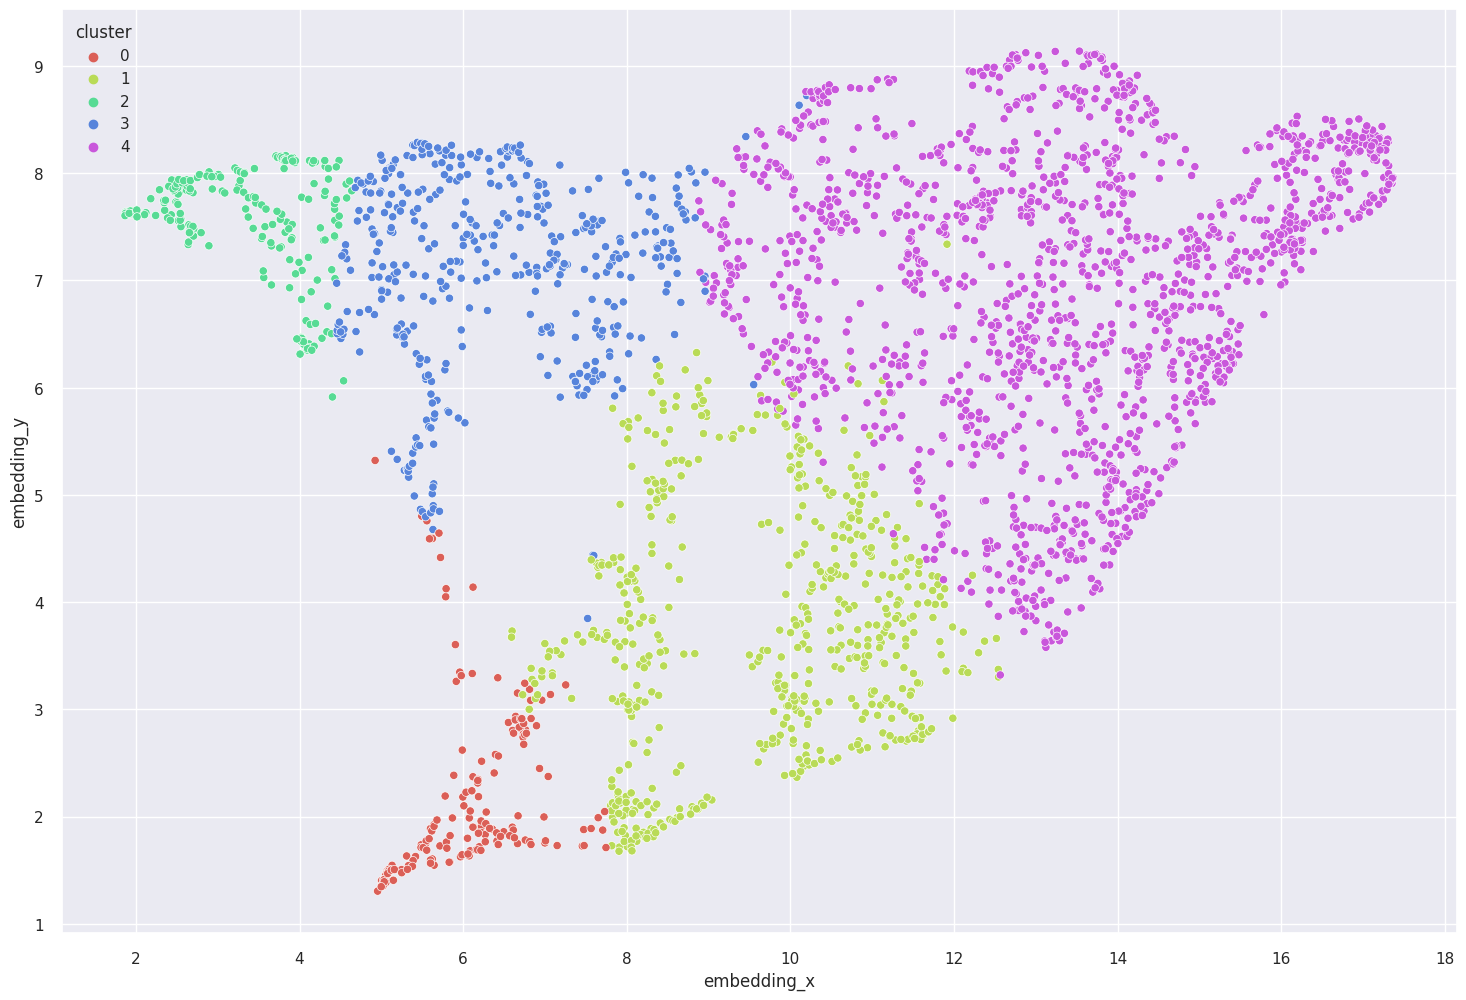

In [90]:
reducer = umap.UMAP( n_neighbors=40, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot( data=df_viz, x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ) )

## 10.2 Cluster Profile

In [91]:
df10.head()

customer_id  gross_revenue  recency_days  qtde_invoices  qtde_items  qtde_products  avg_ticket  avg_recency_days  frequency  qtde_returns  avg_basket_size  avg_unique_basket_size  cluster
0        17850       0.019292      0.997319       0.160976    0.008799       0.037774    0.003595          0.094521   1.000000      0.004438         0.008317                0.001614        2
1        13047       0.011559      0.150134       0.039024    0.007056       0.021695    0.003764          0.071918   0.001345      0.003883         0.025539                0.044307        4
2        12583       0.024000      0.005362       0.068293    0.025538       0.029479    0.006010          0.060788   0.002052      0.005547         0.055623                0.028594        4
3        13748       0.003375      0.254692       0.019512    0.002225       0.003446    0.007125          0.251142   0.000734      0.000000         0.014447                0.017774        1
4        15100       0.003116      0.892761       0.009756    0.000401       0.000255    0.065116          0.020822   0.003985      0.002441         0.004272                0.000515        2

In [92]:
# Number of Costumer
df_cluster = df10[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100 * (df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# AVG Gross Revenue
df_avg_gross = df10[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross, how='inner', on='cluster')

# AVG Recency Days
df_avg_recency = df10[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency, how='inner', on='cluster')

# AVG Invoice Number
df_invoice_no = df10[['qtde_invoices', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_invoice_no, how='inner', on='cluster')

# AVG Ticket 
df_ticket = df10[['avg_ticket', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_ticket, how='inner', on='cluster')

df_cluster

cluster  customer_id  perc_customer  gross_revenue  recency_days  qtde_invoices  avg_ticket
0        0          173       5.828841       0.002193      0.137179       0.005160    0.005172
1        1          595      20.047170       0.004238      0.105914       0.010748    0.005802
2        2          208       7.008086       0.003459      0.744226       0.005722    0.017313
3        3          433      14.588949       0.003563      0.393099       0.010297    0.006242
4        4         1559      52.526954       0.015016      0.064120       0.035573    0.006361

# 11.0 DEPLOY TO PRODUCTION